# **Daily Gold Price (2015-2025) Time Series**

## About Dataset

**Content:**

Daily gold prices (2014-01-01 to 2025-01-06)

**Acknowledgements:**

Raw Data Source: MCX Market
This data frame is pre-processed to time series analysis and forecasting

**Inspiration:**

Forecast, Predict Prices, Time Series Forecasting

**<font color=red>Note</font>**

**<font color=orange>Prices are in INR (Indian Rupee) for 10gm of Gold 24K.</font>**

Gold Prices in this dataset makes no guarantee or warranty on the accuracy or completeness of the data provided.

**Provider:** Nisarg Chodvadiya

**Reference:** https://www.kaggle.com/datasets/nisargchodavadiya/daily-gold-price-20152021-time-series

## About this notebook

For this notebook, we used the source code shared by Manar Mohamed on Kaggle as a reference. (https://www.kaggle.com/code/mannarmohamedsayed/daily-gold-price-forecasting/notebook)

In addition, we also refer to Emilykang’s article on Medium about Gold Price Time Series Analysis.
(https://medium.com/@emilychaukang/gold-price-time-series-analysis-154af77f22f2)

## Import Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
from datetime import timedelta
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix,mean_squared_error
import zipfile
from sklearn.preprocessing import MinMaxScaler
import os
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')

## Read Data

In [2]:
data=pd.read_csv('C:/Users/User/My Porject (Jupyter notebook)/Database/Gold Price.csv')

## Explore Data

In [3]:
data.head()

,Date,Price,Open,High,Low,Volume,Chg%
0,2025-01-06,77149,77309,77542,76545,27160,0.44
1,2025-01-03,76813,77246,78600,76613,60,-0.05
2,2025-01-02,76849,76849,76849,76849,0,0.83
3,2025-01-01,76214,76232,76302,76053,60,-0.02
4,2024-12-31,76232,75680,76970,75572,1920,0.95


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2848 entries, 0 to 2847
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2848 non-null   object 
 1   Price   2848 non-null   int64  
 2   Open    2848 non-null   int64  
 3   High    2848 non-null   int64  
 4   Low     2848 non-null   int64  
 5   Volume  2848 non-null   int64  
 6   Chg%    2848 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 155.9+ KB


## Detail for the dataset
- **Date**: Date in standard format.
- **Price**: It is close price which can be considered as final price.
- **Open**: Price at the time of market opening at that day.
- **High**: Highest price during whole day.
- **Low**: Lowest price during whole day.
- **Volume**: Traded Volume.
- **Chg%**: % Change from previous price.

## Data Preparation

In [4]:
data['Date']=pd.to_datetime(data['Date'])

In [5]:
data['Month']=data['Date'].dt.month_name()
data['Year']=data['Date'].dt.year
data.head()

,Date,Price,Open,High,Low,Volume,Chg%,Month,Year
0,2025-01-06,77149,77309,77542,76545,27160,0.44,January,2025
1,2025-01-03,76813,77246,78600,76613,60,-0.05,January,2025
2,2025-01-02,76849,76849,76849,76849,0,0.83,January,2025
3,2025-01-01,76214,76232,76302,76053,60,-0.02,January,2025
4,2024-12-31,76232,75680,76970,75572,1920,0.95,December,2024


In [6]:
# Arranged from old to new in chronological order
data=data.sort_values(by='Date')
data

,Date,Price,Open,High,Low,Volume,Chg%,Month,Year
2847,2014-01-01,29542,29435,29598,29340,2930,0.25,January,2014
2846,2014-01-02,29975,29678,30050,29678,3140,1.47,January,2014
2845,2014-01-03,29727,30031,30125,29539,3050,-0.83,January,2014
2844,2014-01-04,29279,29279,29279,29279,0,-1.51,January,2014
2843,2014-01-06,29119,29300,29395,29051,24380,-0.55,January,2014
...,...,...,...,...,...,...,...,...,...
4,2024-12-31,76232,75680,76970,75572,1920,0.95,December,2024
3,2025-01-01,76214,76232,76302,76053,60,-0.02,January,2025
2,2025-01-02,76849,76849,76849,76849,0,0.83,January,2025
1,2025-01-03,76813,77246,78600,76613,60,-0.05,January,2025


In [7]:
# Convert currency from INR (Indian Rupee) to TWD (New Taiwan Dollar)
# The exchange rate is based on the date 2025/7/24
data['Price']=data['Price']*0.34
data['Open']=data['Open']*0.34
data['High']=data['High']*0.34
data['Low']=data['Low']*0.34

In [8]:
#set the index by date
data=data.set_index('Date')

In [9]:
data.head()

,Price,Open,High,Low,Volume,Chg%,Month,Year
Date,,,,,,,,
2014-01-01,10044.28,10007.90,10063.32,9975.60,2930,0.25,January,2014
2014-01-02,10191.50,10090.52,10217.00,10090.52,3140,1.47,January,2014
2014-01-03,10107.18,10210.54,10242.50,10043.26,3050,-0.83,January,2014
2014-01-04,9954.86,9954.86,9954.86,9954.86,0,-1.51,January,2014
2014-01-06,9900.46,9962.00,9994.30,9877.34,24380,-0.55,January,2014


## Basic EDA

In [11]:
data['Year'].unique()

array([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024,
       2025])

In [12]:
data['Month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [59]:
def plot_feature(col,color):
   plt.plot(data[col],color)
   plt.title(f'Trend of {col}')
   plt.ylabel(f'{col}')


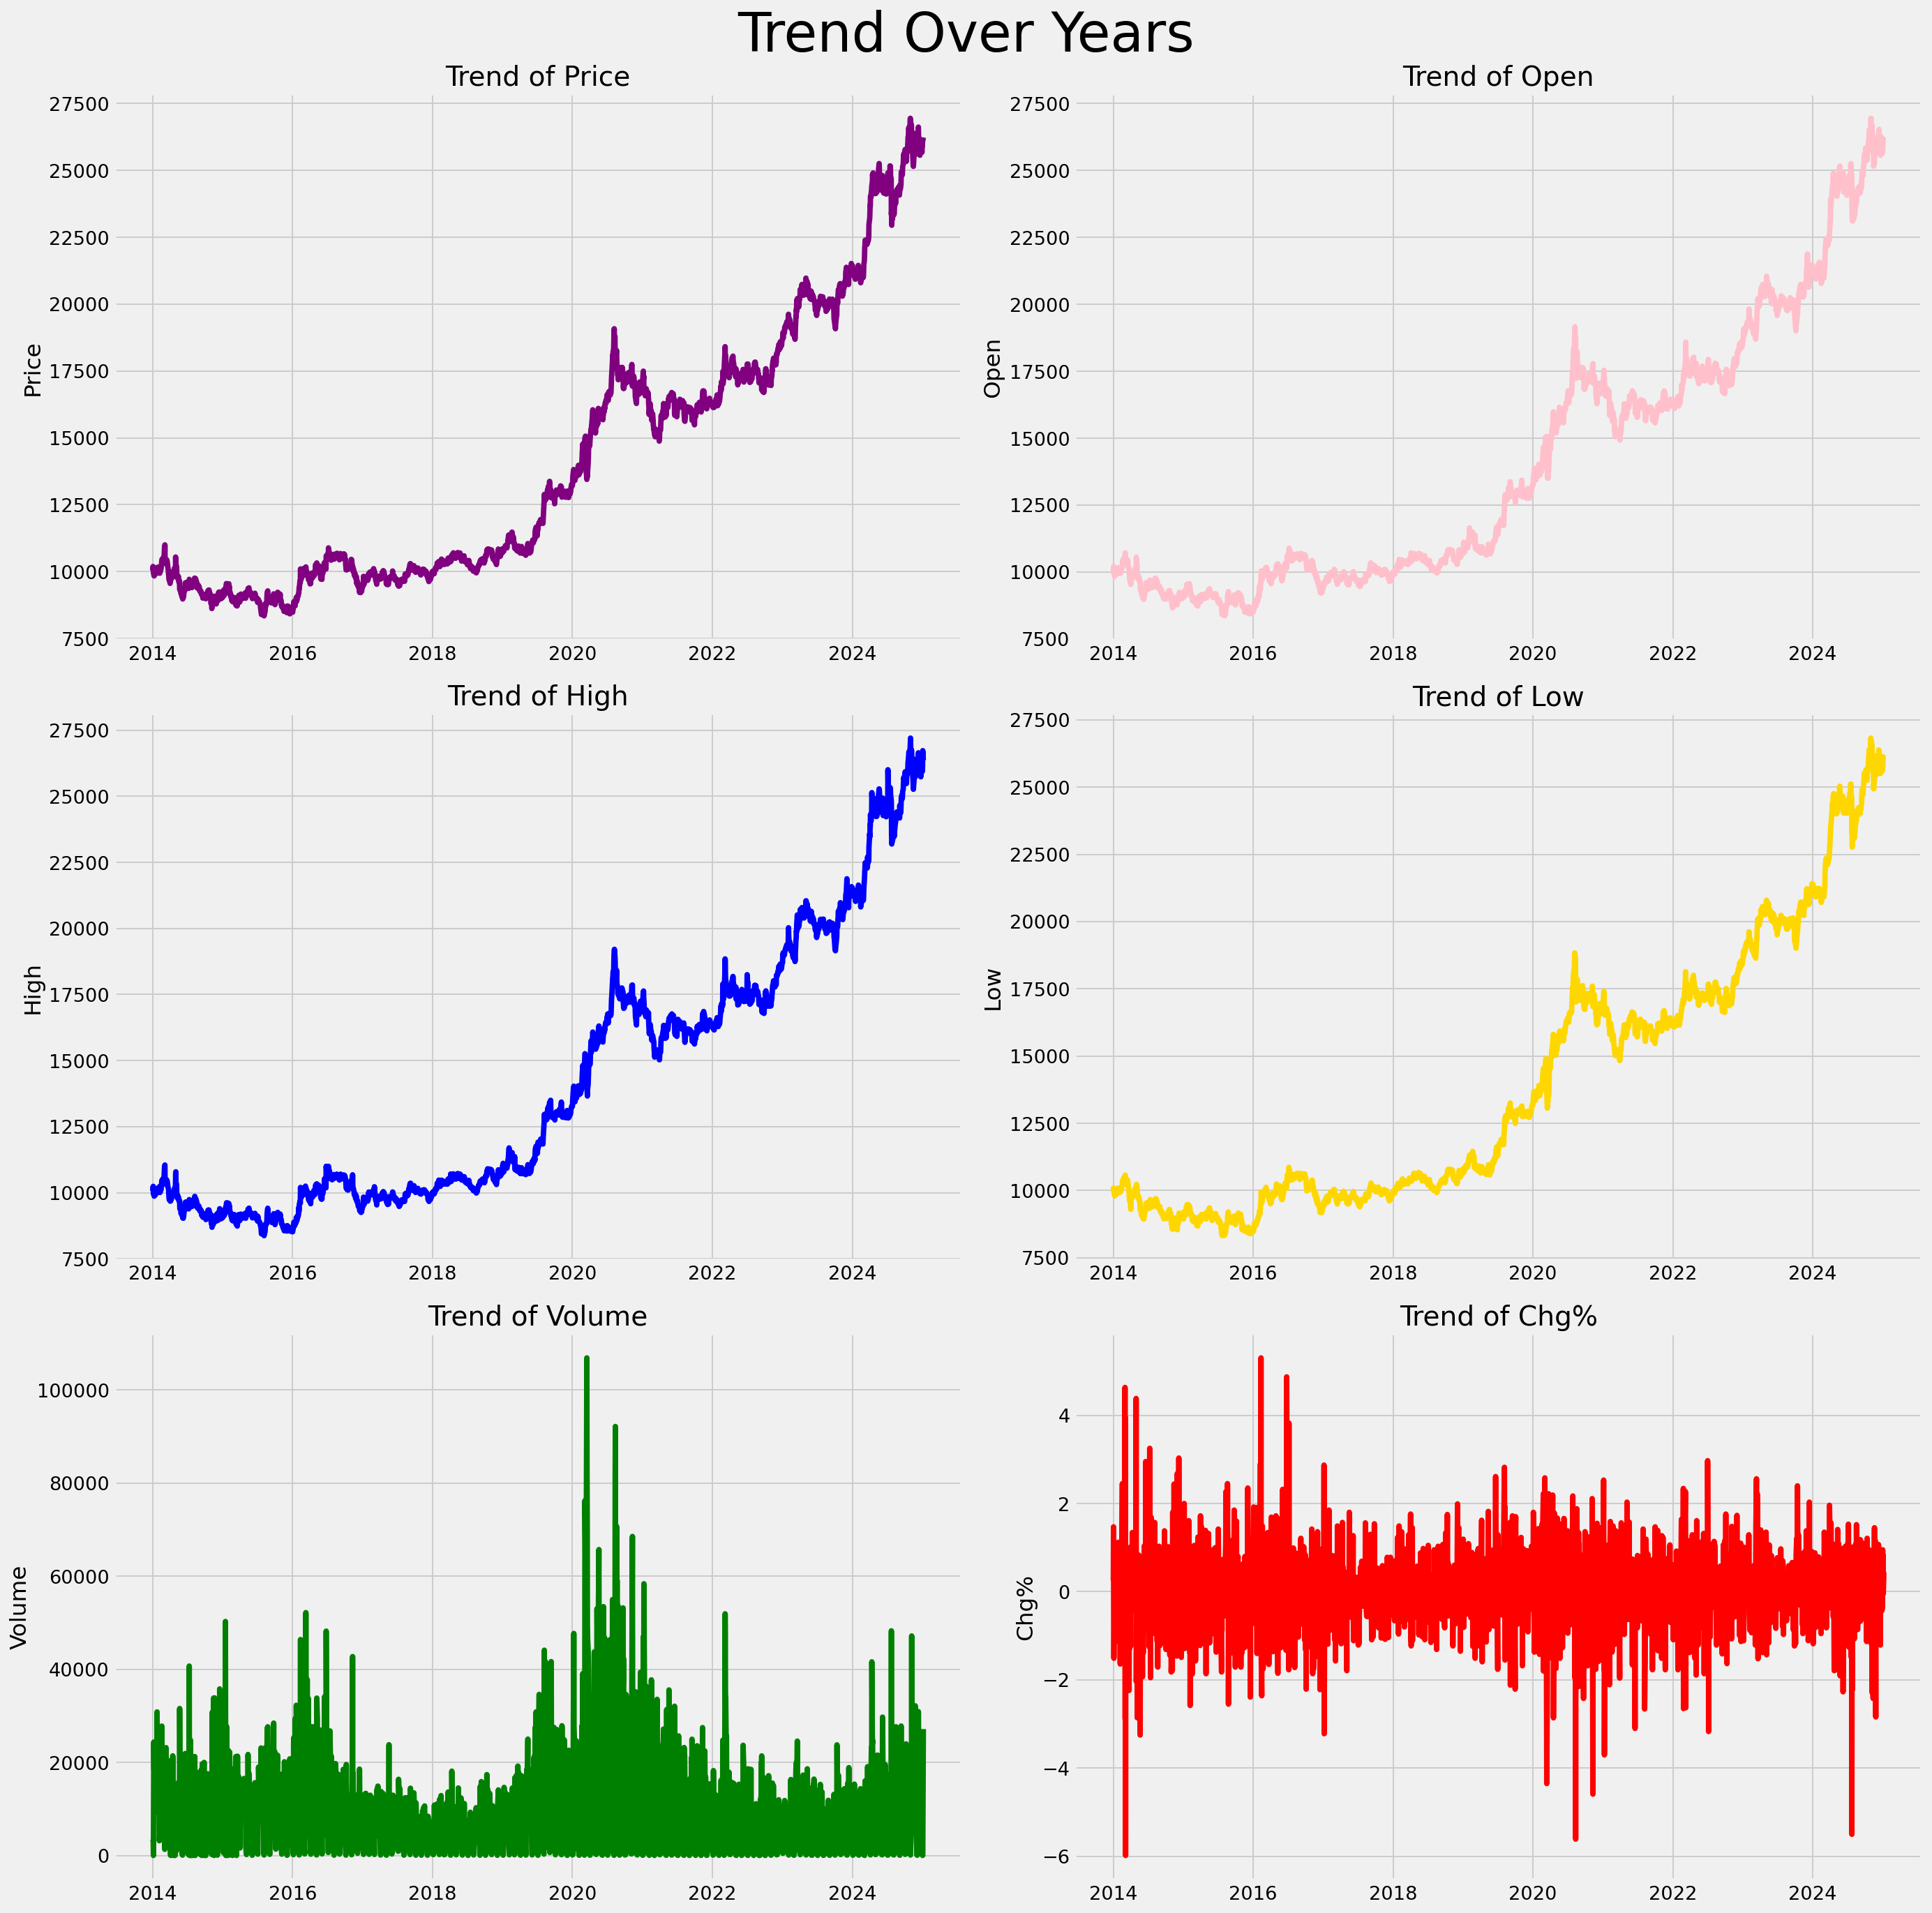

In [60]:
plt.figure(figsize=(20,20))
colors=['purple','pink','blue','gold','green','red']
plt.suptitle('Trend Over Years',fontsize=40)
for i,col in enumerate(data.columns[:-2]):
    plt.subplot(3,2,i+1)
    plot_feature(col,colors[i])
plt.tight_layout()
plt.show()

In [15]:
#total price over months
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
month_grouped=data.groupby('Month').sum()
month_grouped=month_grouped.sort_values(by='Price')
month_grouped=month_grouped.reindex(months)
month_grouped

,Price,Open,High,Low,Volume,Chg%,Year
Month,,,,,,,
January,3254656.12,3253133.94,3269368.60,3238977.70,3102629,32.46,490622
February,3016839.04,3018027.34,3034540.46,2999830.20,2624810,8.07,454270
March,3274888.84,3275028.58,3297800.08,3251599.86,3787559,-0.50,488597
April,3138898.70,3136110.02,3155711.36,3119260.30,2659068,33.74,454260
May,3431541.46,3431832.84,3449537.66,3413745.18,3396529,-5.81,492643
June,3299762.90,3300837.30,3317141.66,3283378.98,2849009,6.41,476480
July,3467041.20,3468394.06,3486175.38,3449921.86,3309629,7.93,498668
August,3383133.62,3382440.02,3401700.68,3363383.70,3170819,16.06,478506
September,3386267.74,3389070.36,3403714.84,3370672.28,3043378,-11.91,480507


The Year is also added up, but that's okay.

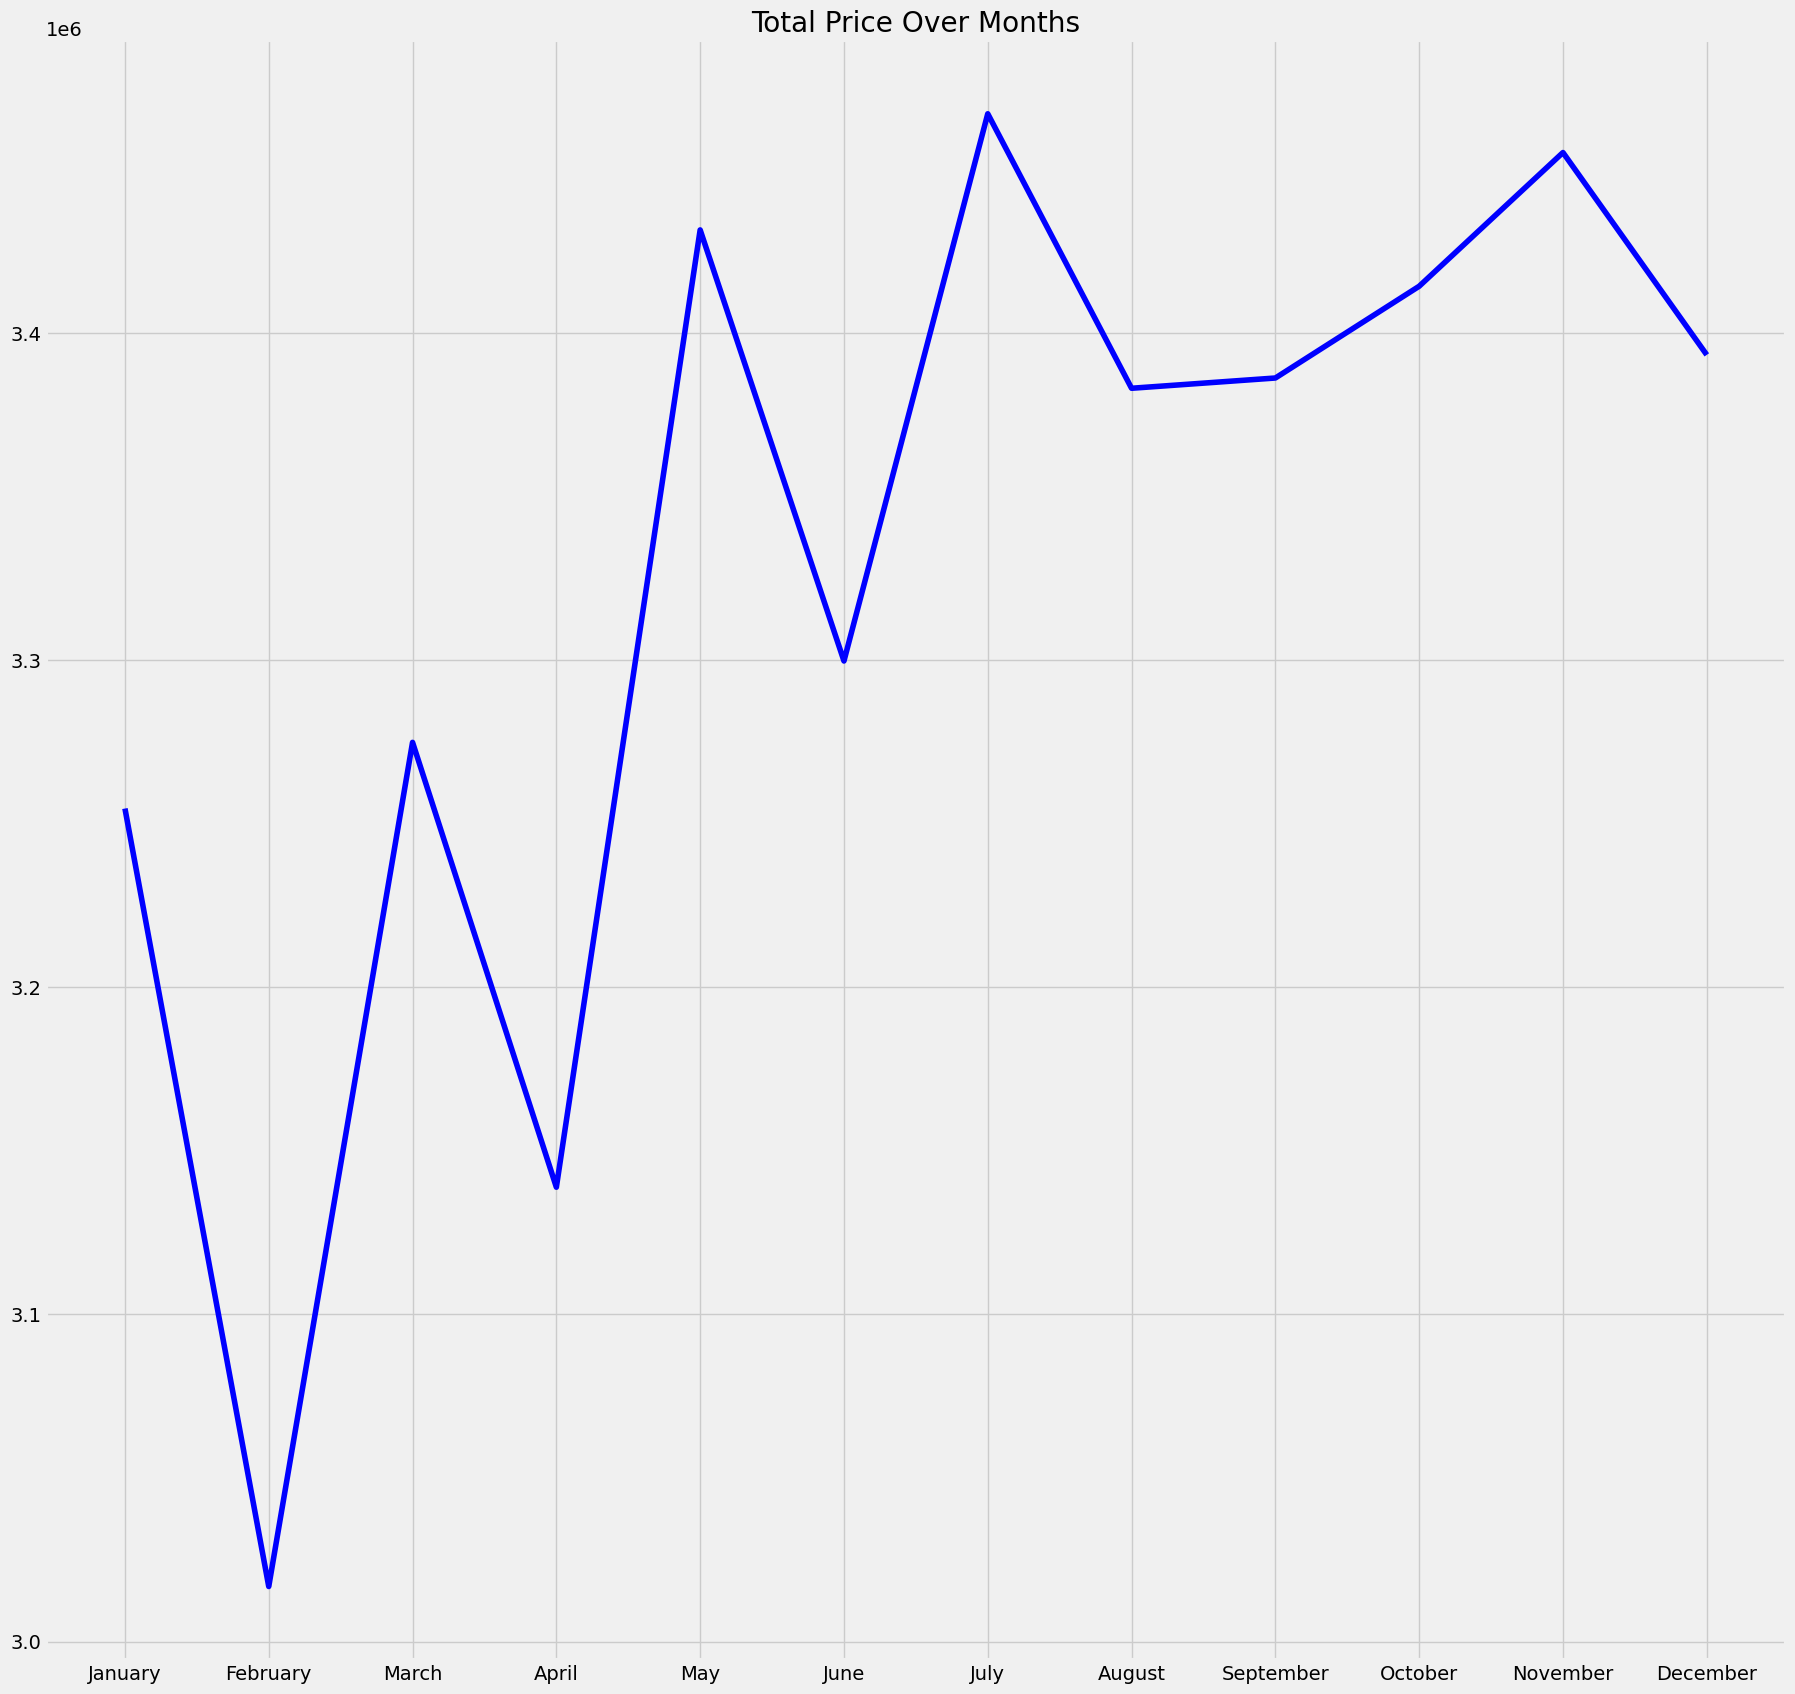

In [16]:
plt.figure(figsize=(20,20))
plt.title('Total Price Over Months')
plt.plot(month_grouped.index,month_grouped['Price'],colors[2])



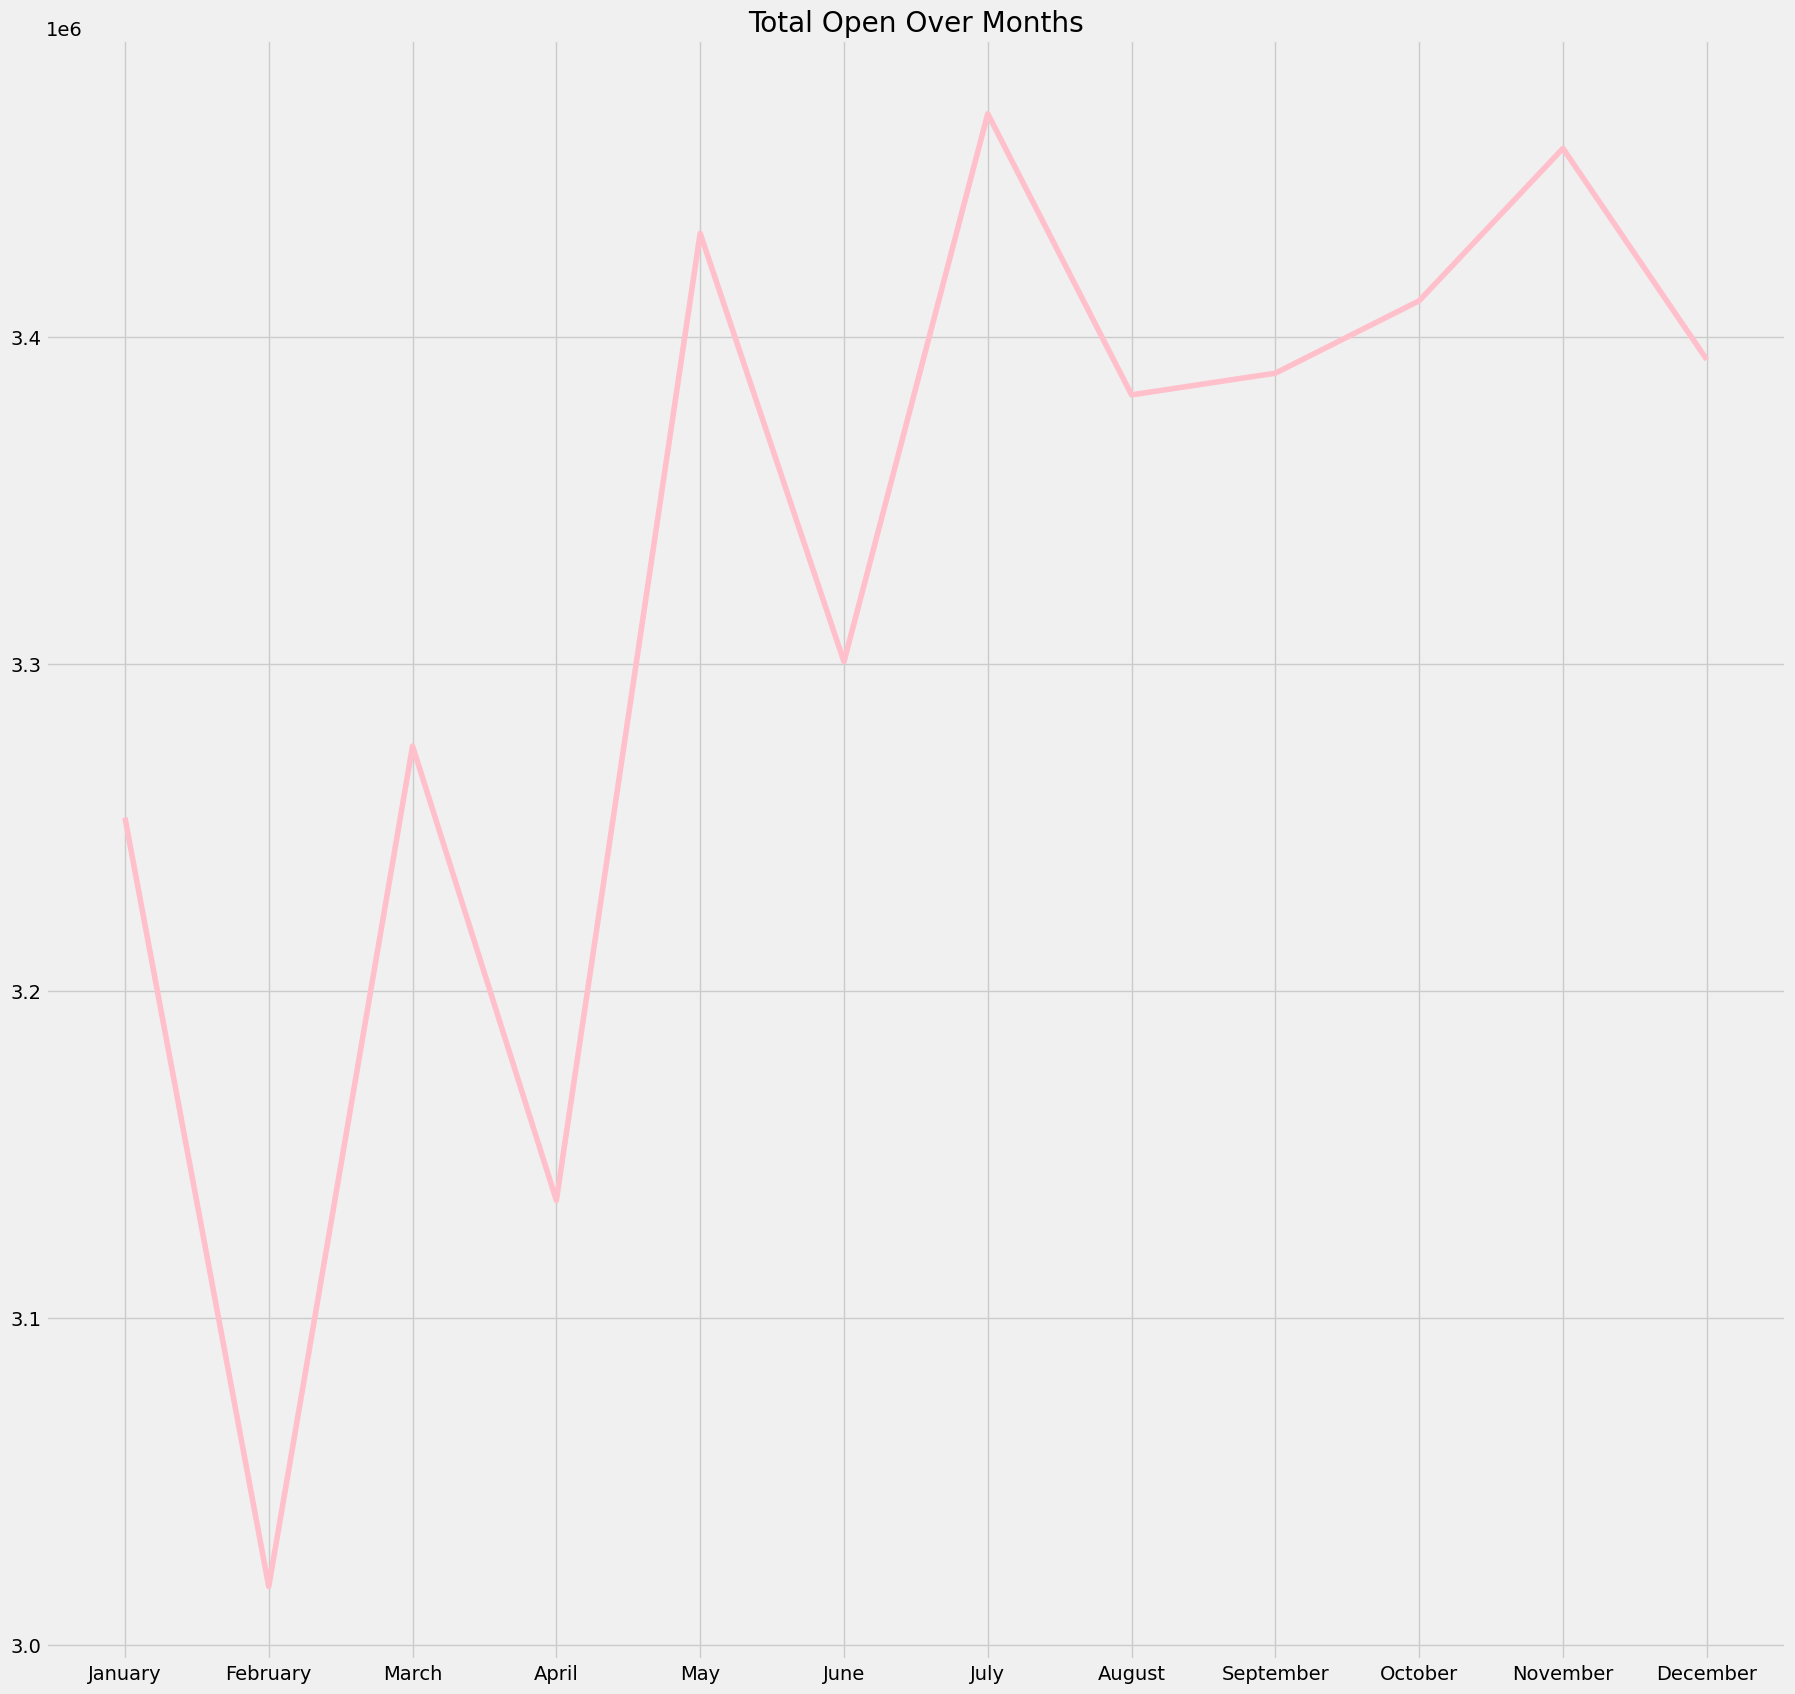

In [17]:
plt.figure(figsize=(20,20))
plt.title('Total Open Over Months')
plt.plot(month_grouped.index,month_grouped['Open'],colors[1])



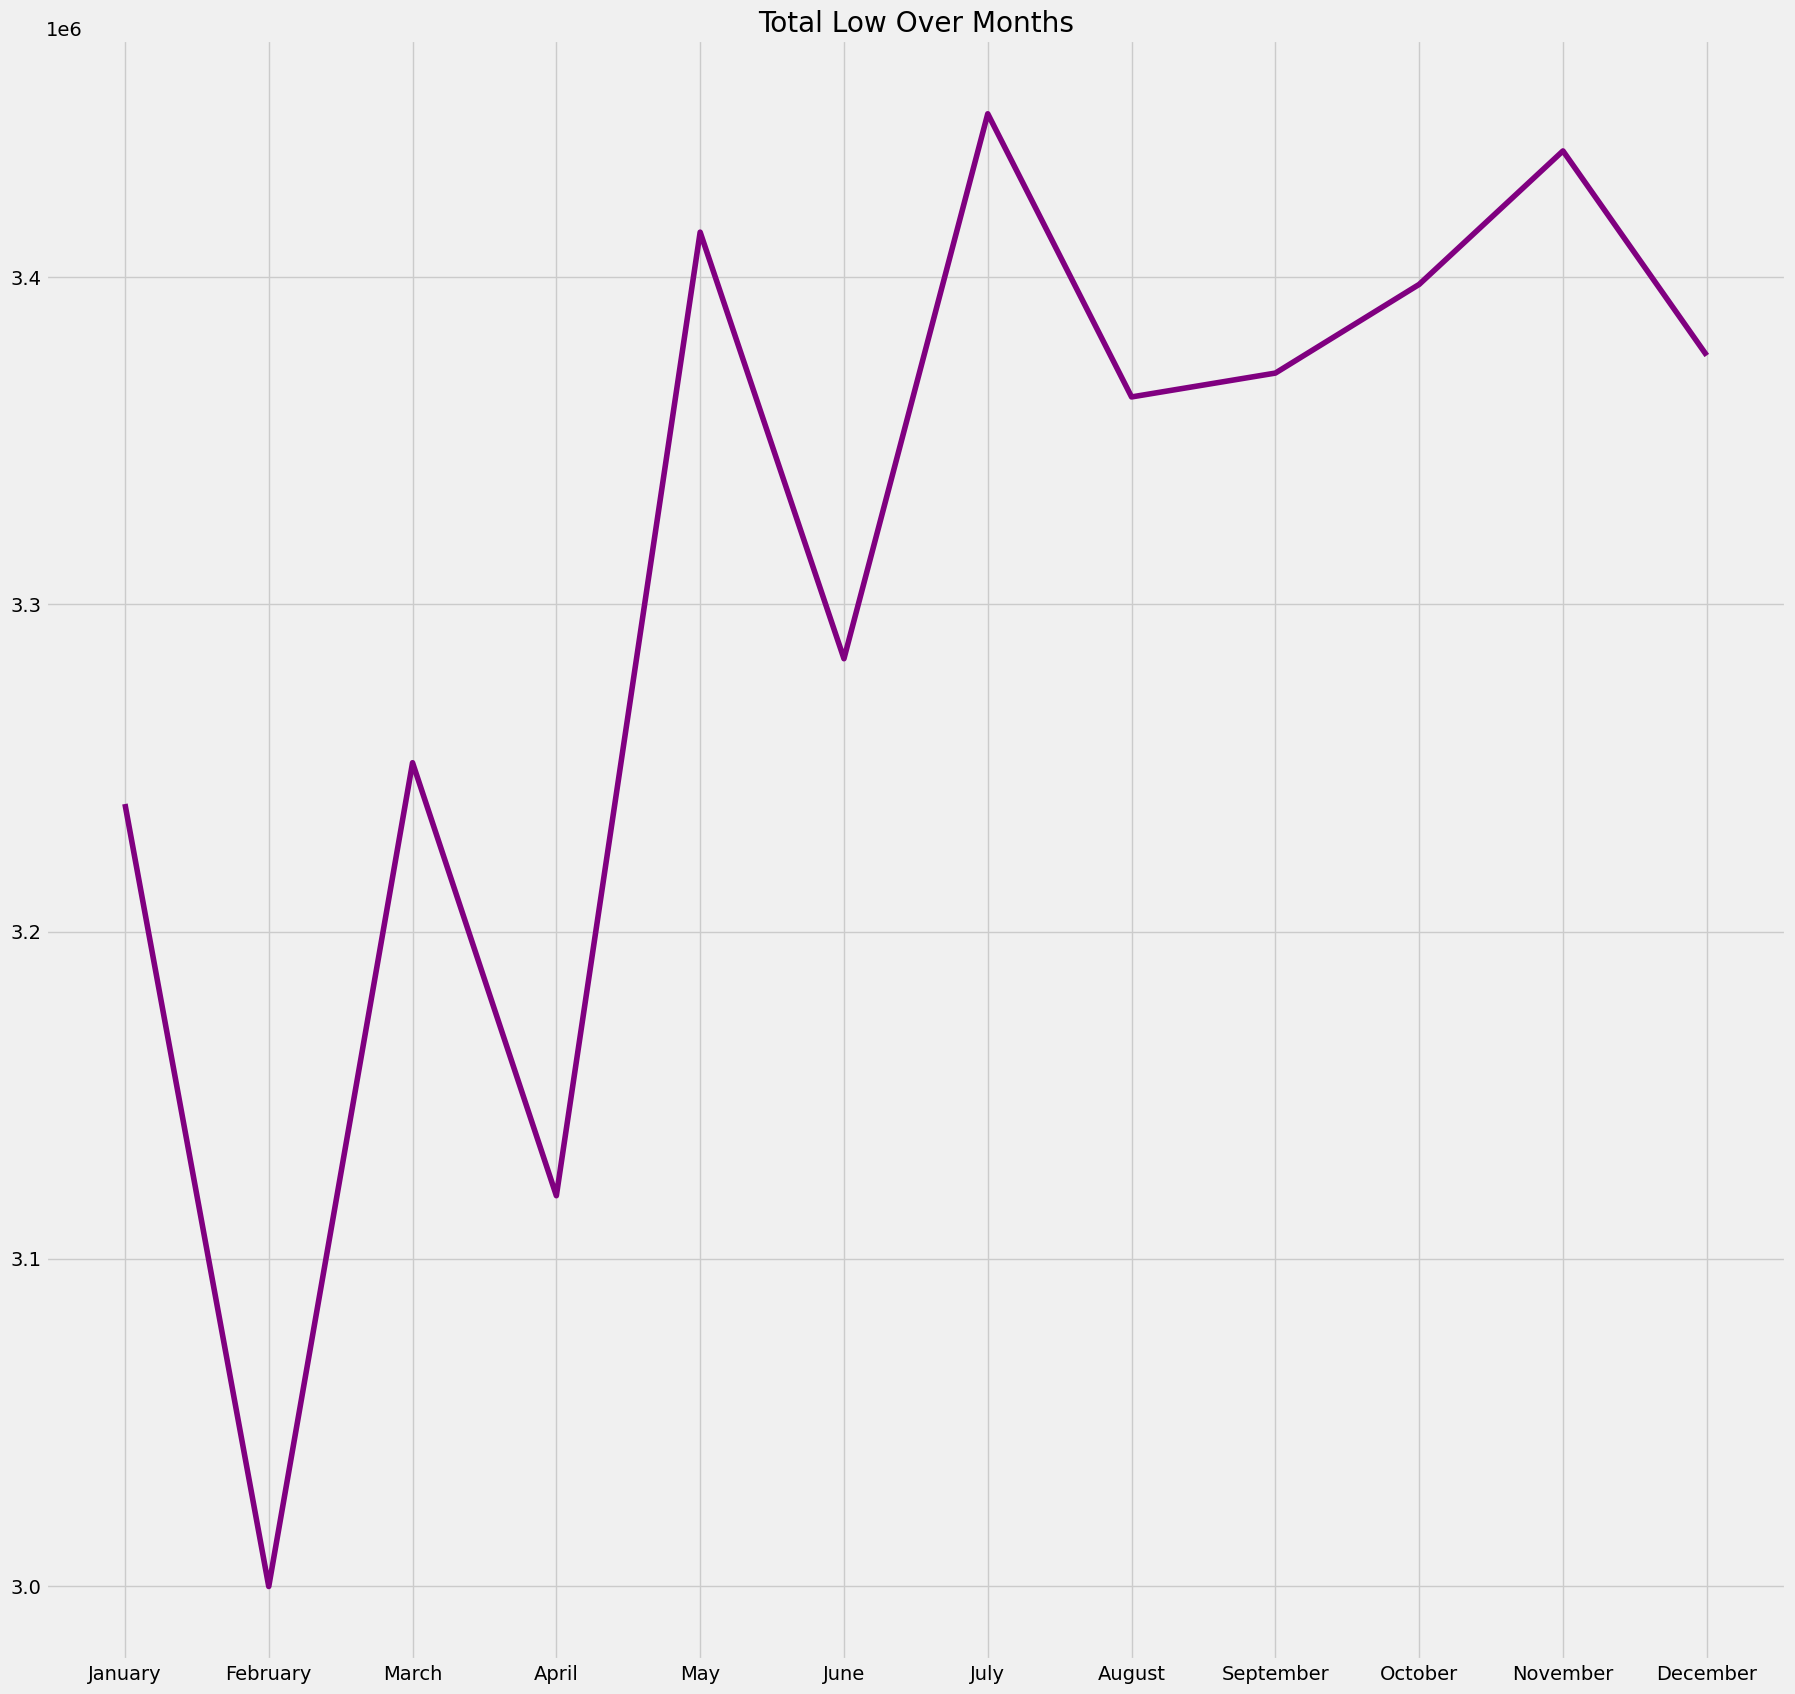

In [18]:
plt.figure(figsize=(20,20))
plt.title('Total Low Over Months')
plt.plot(month_grouped.index,month_grouped['Low'],colors[0])



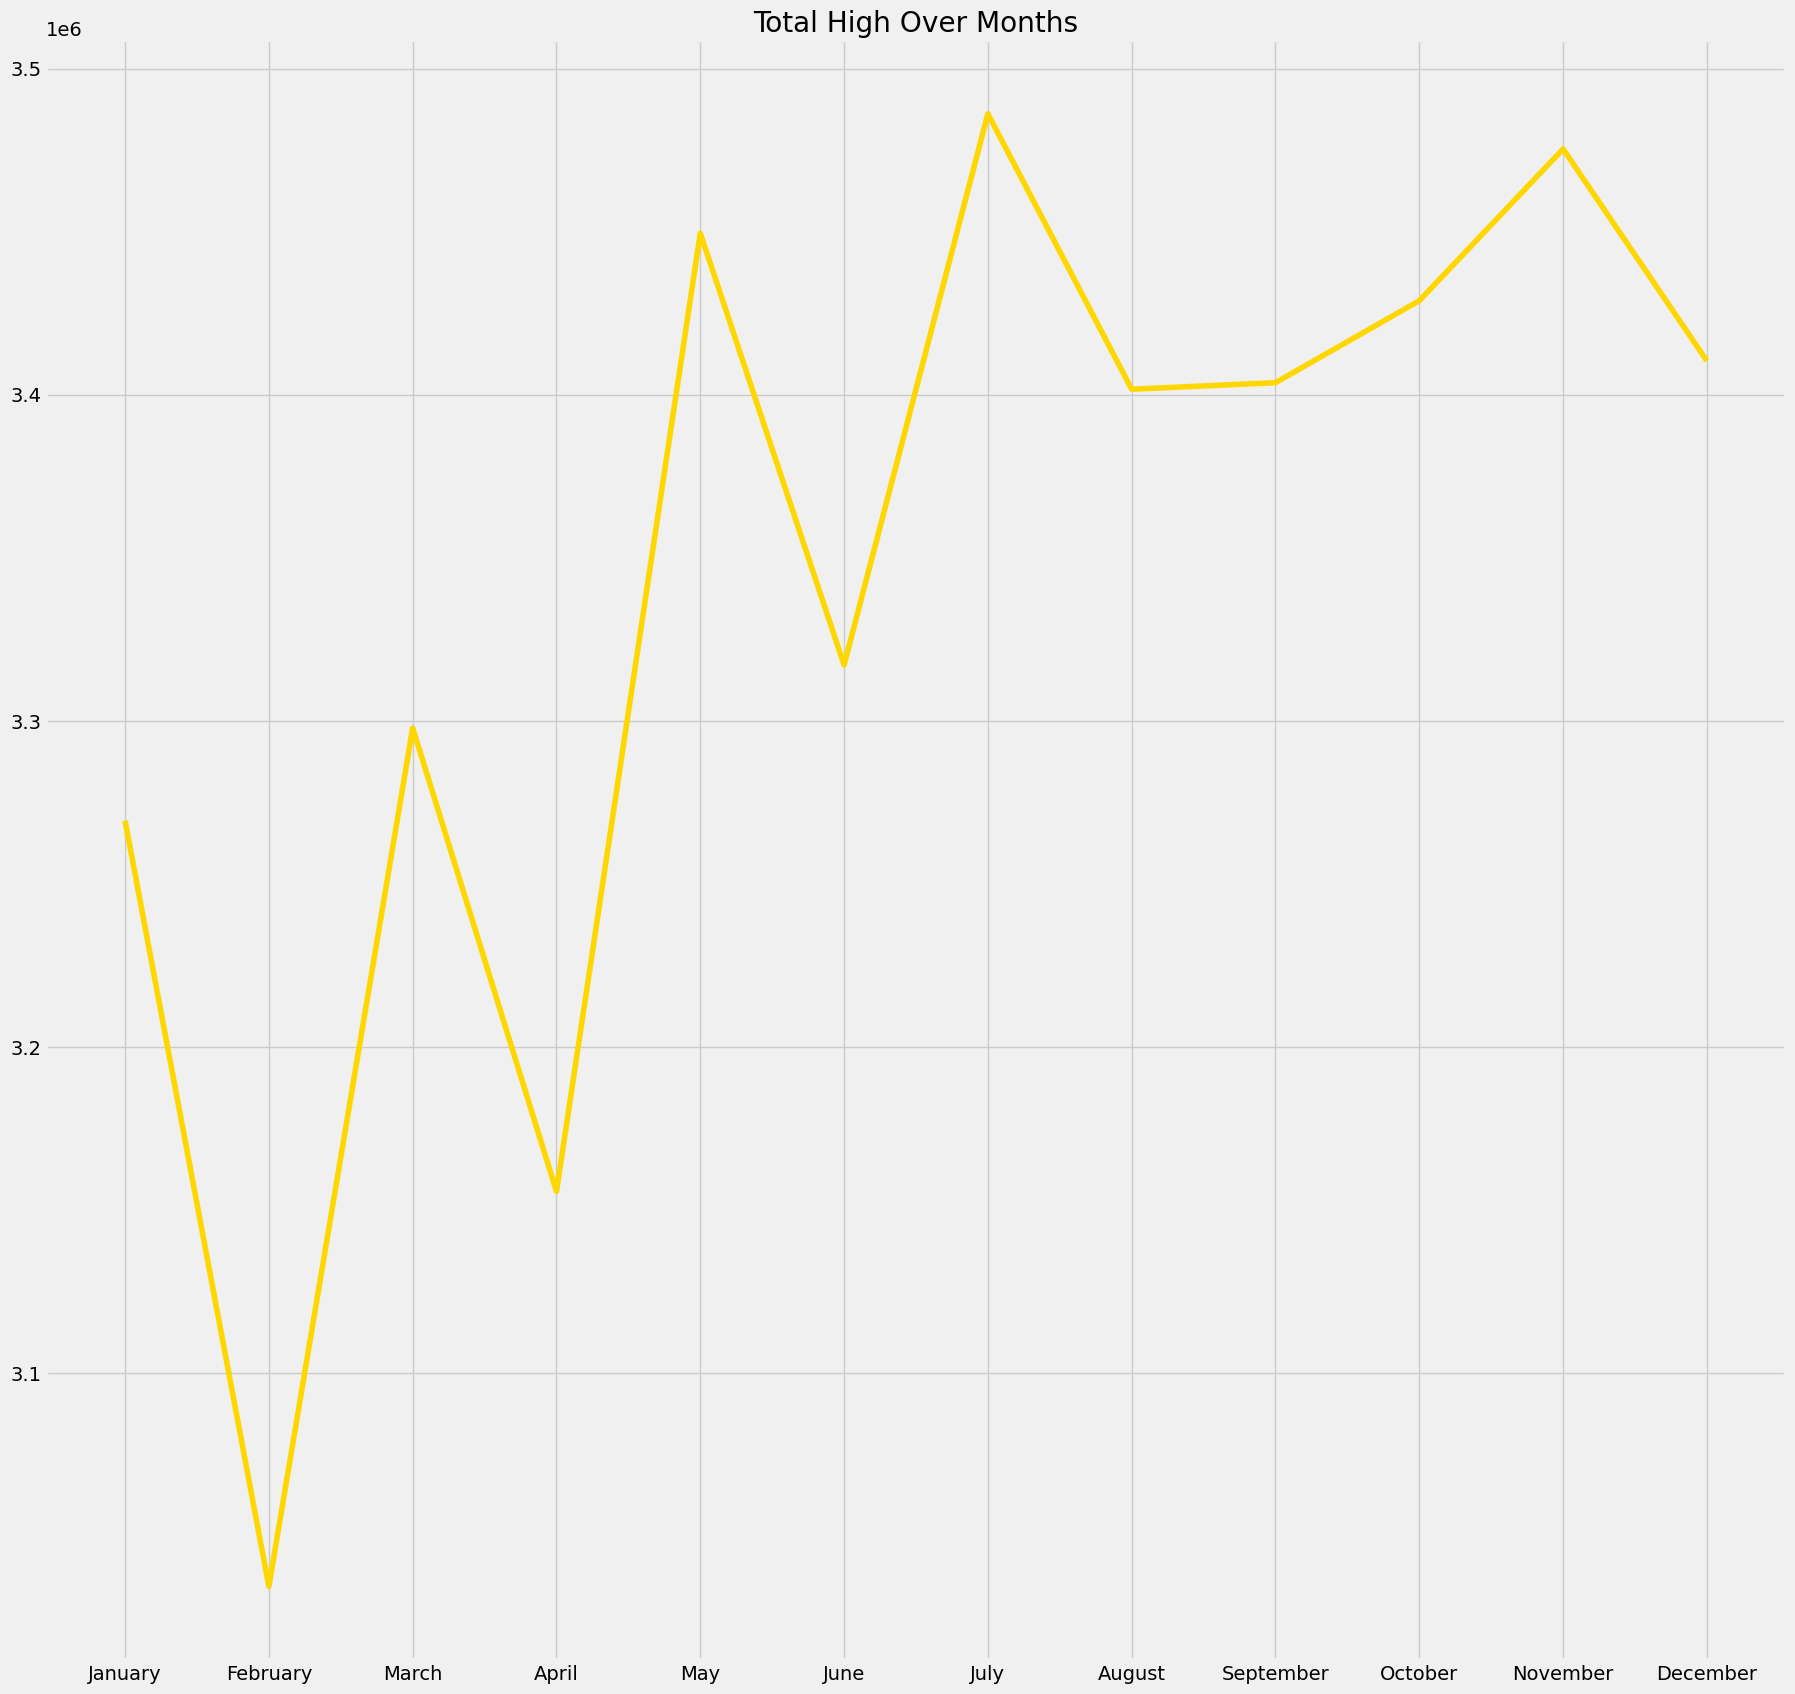

In [19]:
plt.figure(figsize=(20,20))
plt.title('Total High Over Months')
plt.plot(month_grouped.index,month_grouped['High'],colors[3])



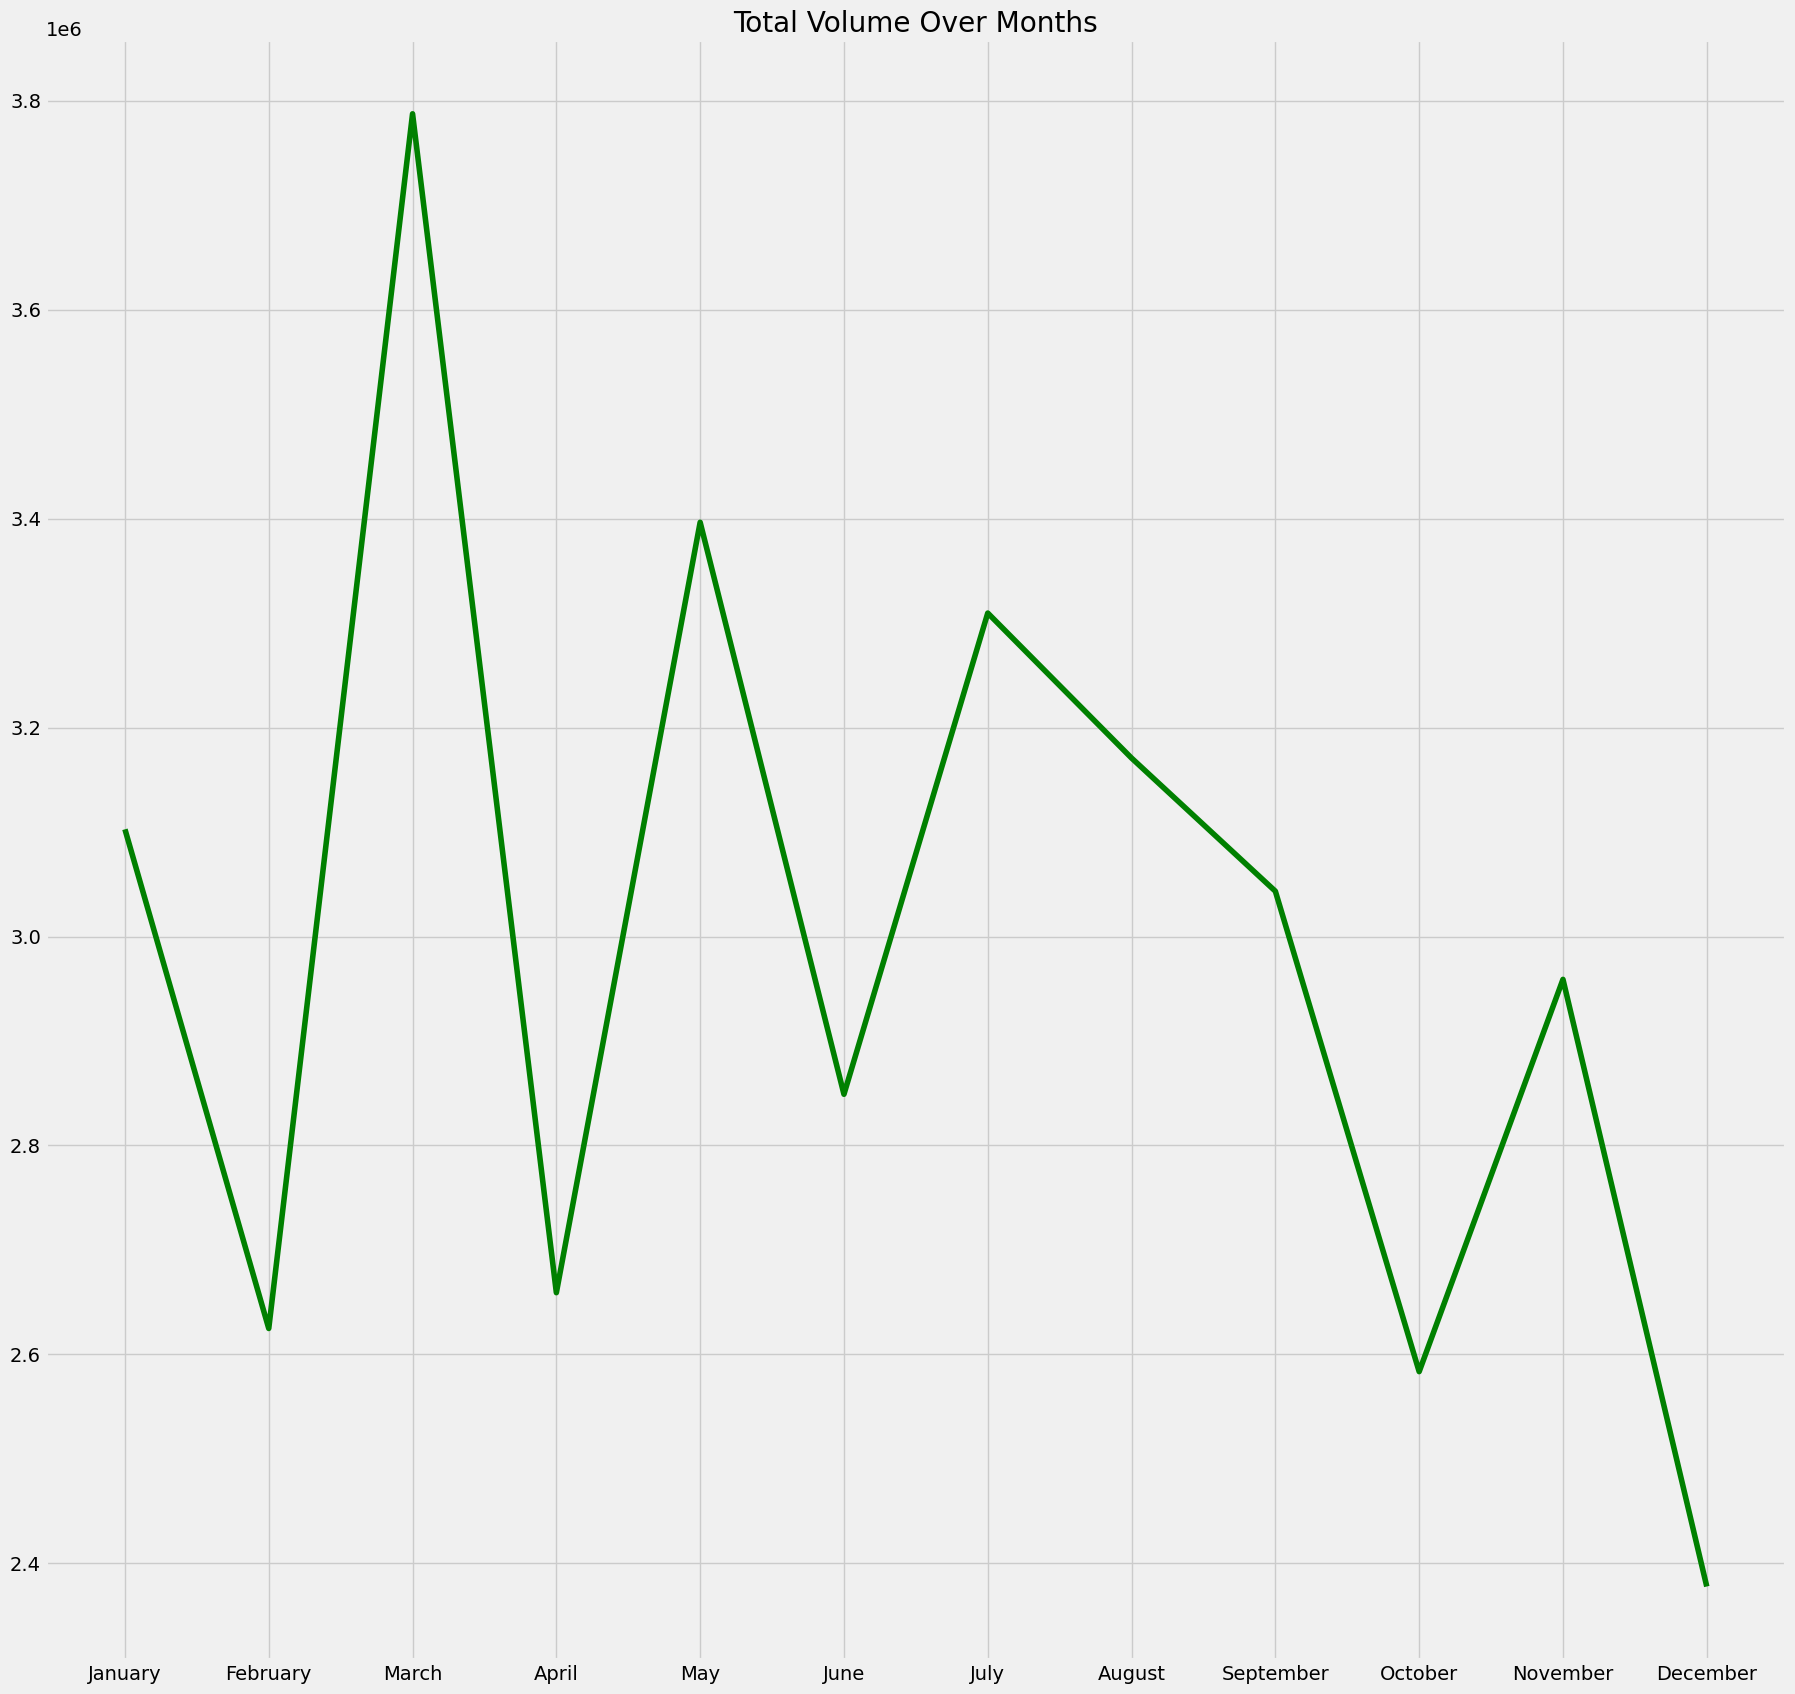

In [20]:
plt.figure(figsize=(20,20))
plt.title('Total Volume Over Months')
plt.plot(month_grouped.index,month_grouped['Volume'],colors[4])



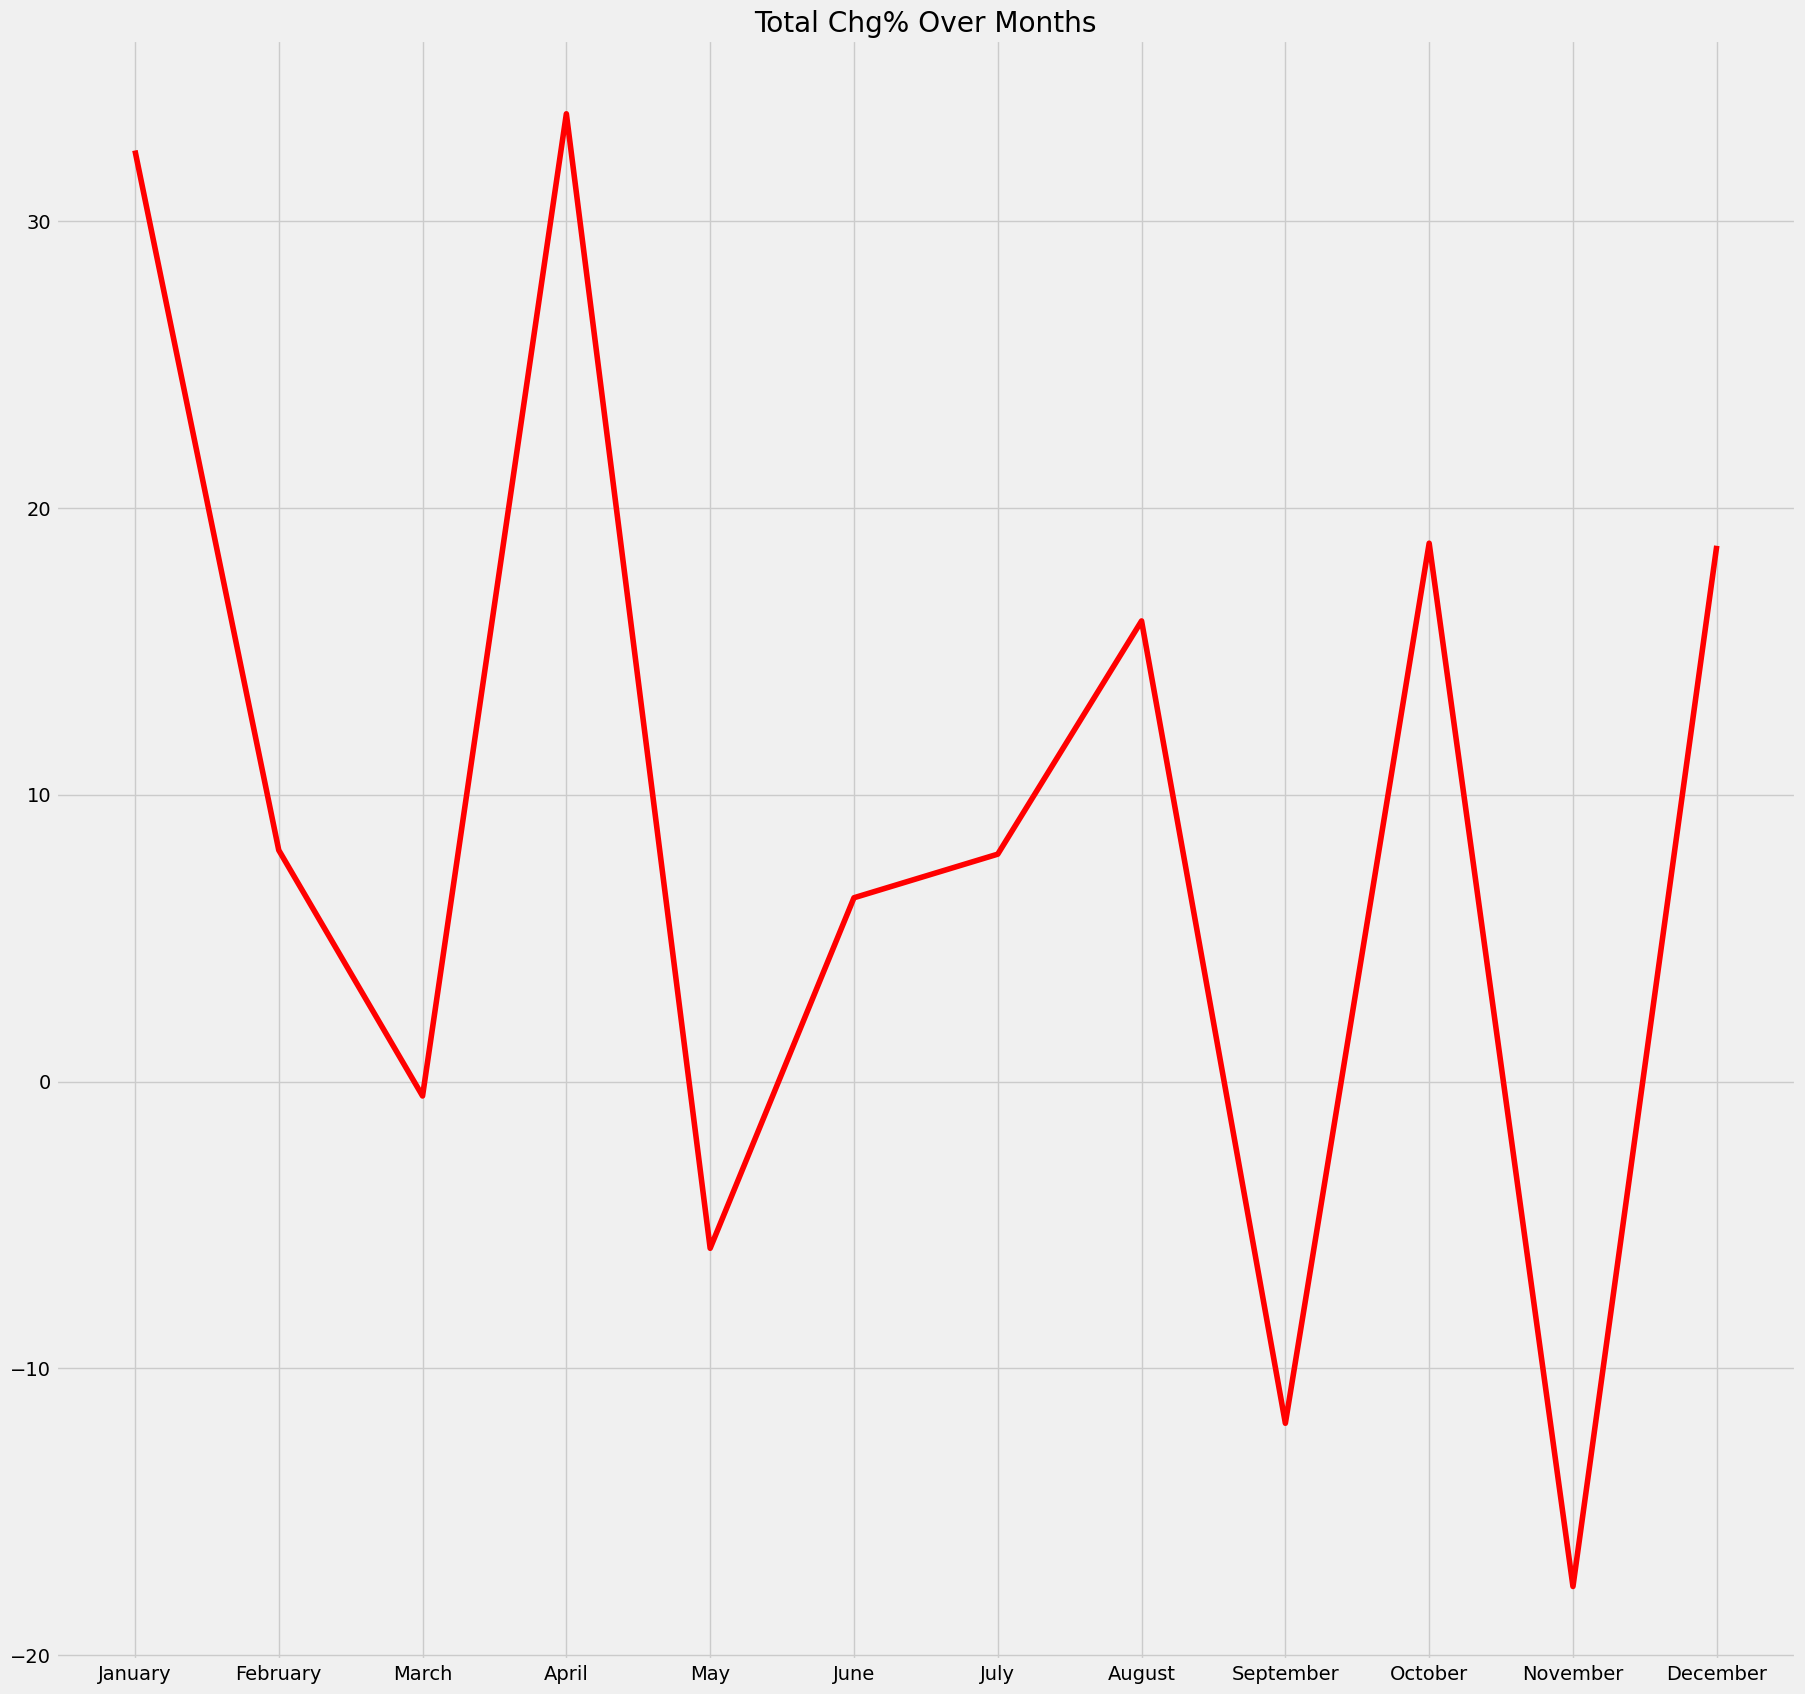

In [21]:
plt.figure(figsize=(20,20))
plt.title('Total Chg% Over Months')
plt.plot(month_grouped.index,month_grouped['Chg%'],colors[5])



In [22]:
years=data['Year'].unique()
grouped_year=data.groupby('Year',)[data.columns[:-2]].mean()
grouped_year=grouped_year.sort_values(by='Price')
grouped_year=grouped_year.reindex(years)
grouped_year


,Price,Open,High,Low,Volume,Chg%
Year,,,,,,
2014,9554.463060,9551.186119,9613.016642,9495.470522,12407.313433,-0.032724
2015,8943.688321,8949.382672,8996.793206,8896.977252,12675.835878,-0.021069
2016,10005.424170,10007.285637,10067.814826,9947.038687,14576.096525,0.045097
2017,9842.740000,9840.046667,9880.569333,9801.194667,7799.596078,0.025255
2018,10415.987656,10414.642266,10457.445078,10374.817109,7081.398438,0.028945
2019,11861.901479,11861.995409,11923.855564,11800.473930,13946.809339,0.085992
2020,16071.091008,16064.244884,16185.690775,15930.400853,26857.860465,0.103488
2021,16097.208108,16108.456988,16185.093514,16019.168263,14459.922780,-0.013475
2022,17338.153152,17340.449805,17431.076342,17253.393930,9279.525292,0.054786


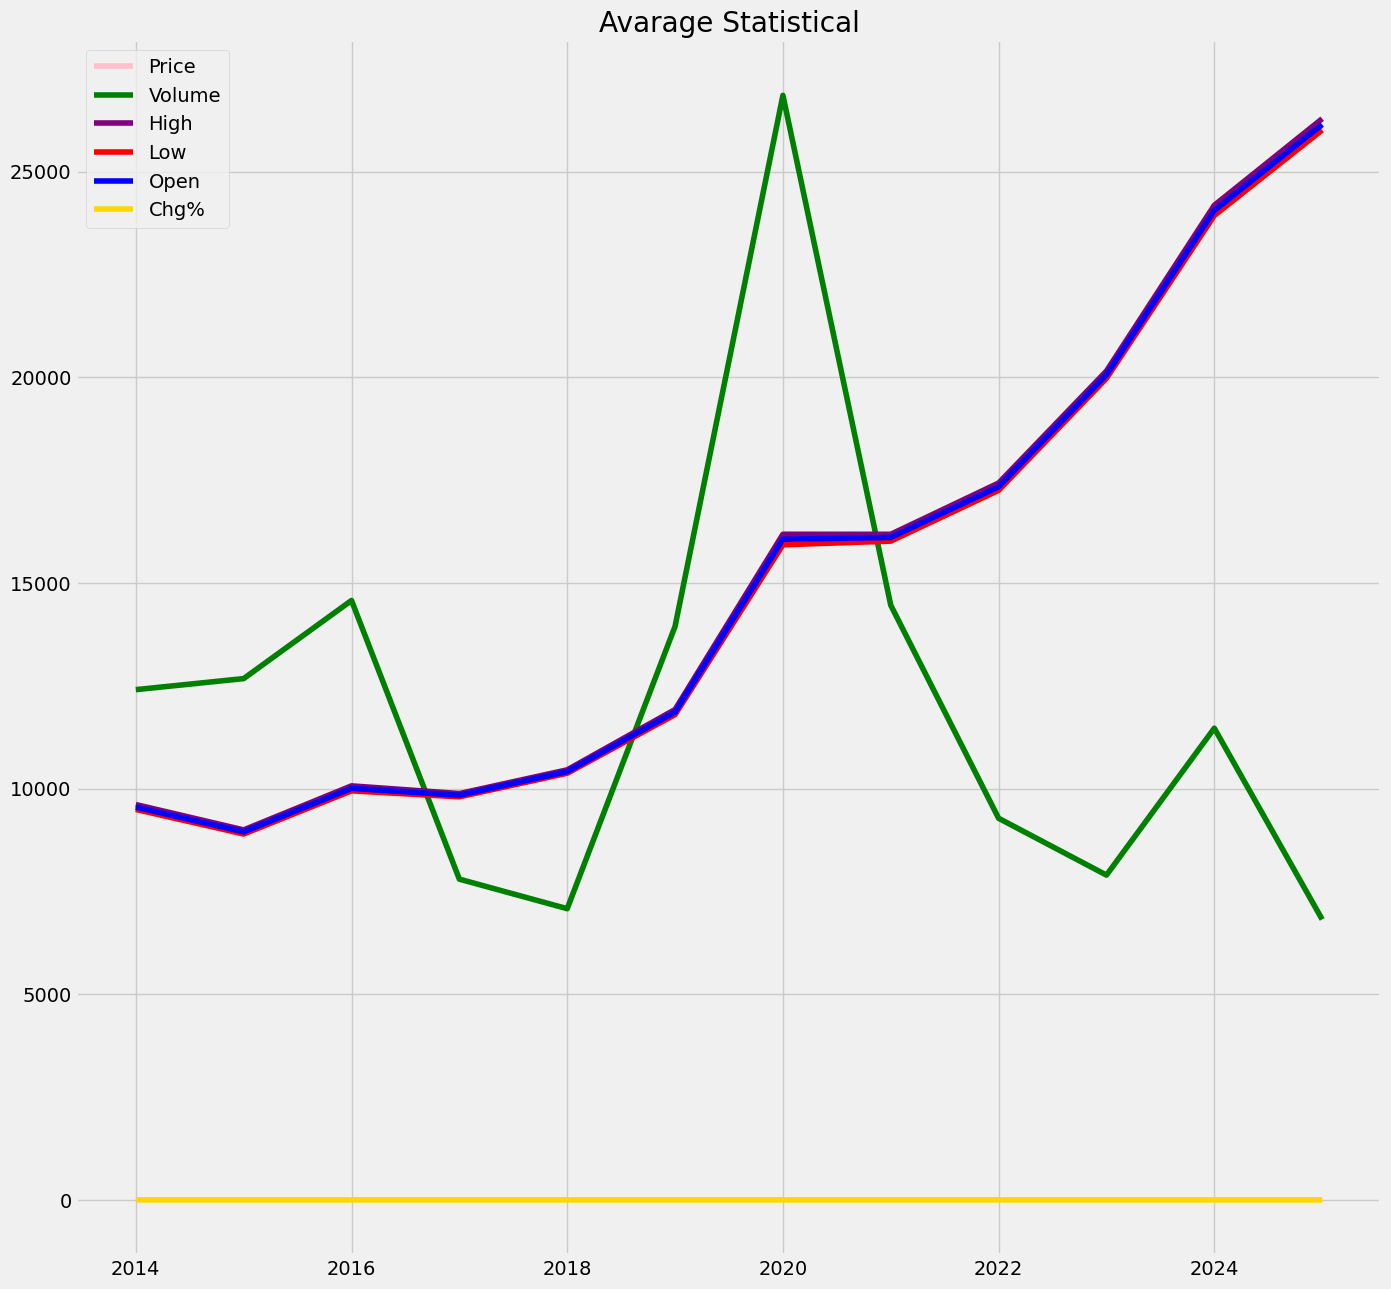

In [23]:
plt.figure(figsize=(15,15))
plt.plot(grouped_year['Price'],colors[1])
plt.plot(grouped_year['Volume'],colors[4])
plt.plot(grouped_year['High'],colors[0])
plt.plot(grouped_year['Low'],colors[5])
plt.plot(grouped_year['Open'],colors[2])
plt.plot(grouped_year['Chg%'],colors[3])
plt.legend(['Price','Volume','High','Low','Open','Chg%'])
plt.title(f'Avarage Statistical')
plt.show()

## Advanced EDA for time series
**<font color =red>Note:</font>**  Here we only use <font color =orange>'Price' data</font>, i.e., the close price for demonstration. We can also use other price data (e.g. 'High', 'Low') to do EDA.

### ETS (Error-Trend-Seasonality) Decomposition
ETS decomposition is normally the first step of forecasting due to the need of understanding the data. It is the process of separating a time series into different components such as trend, seasonality, and errors/residuals/noise. By separating the components, data scientists can gain insights into the behavior of the data and make better forecasts.

<font color=red>Component of Time Series Analysis:</font>
 1. **<font color=orange>Trend (T):</font>** represents the long-term slow-moving changes in a time series and responsible for making series gradually increase or decrease over time. The trend would be Negative(-) or Positive(+) or Null Trend.
 2. **<font color=orange>Seasonality (S) or cycle (C):</font>** represents the repeating and short-term fluctuations caused by factors like seasons or cycles. The difference between a seasonality and a cycle is that a seasonality rises and falls at consistent frequencies and a cycle doesn’t. Cyclical component is often used to discuss business cycles in economic data. A seasonality or a cycle would be in a shape like bell curve or saw tooth.
 3. **<font color=orange>Errors/Residuals (R):</font>** represents random variability that remains after removing the trend, seasonality, and cycles. It is what cannot be explained by the components above. Also called random errors/white noise.

#### Additive VS Multiplicative Decomposition
There are two decomposition models : additive model and multiplicative model. While an additive model expresses the time series as the sum of its components, a multiplicative model expresses the time series as the product of its components. To choose an appropriate model, we need to consider how the data looks like. An Additive model is applied when the trend seems to be more linear, and the seasonality and the trend components seem to be constant over time. A multiplicative model is more appropriate when the trend seems to be non-linear, and the magnitude of the seasonal component changes over time. Below are the functions and examples of two models.

<font color=yellow>An additive decomposition expresses Y (the data) as :</font>

Y = T (trend)+ S (seasonality) + C (cycle) + R (residuals)

<font color=yellow>A multiplicative decomposition expresses Y (the data) as :</font>

Y = T (trend)* S (seasonality) *C (cycle) *R (residuals)

We can usually identify whether a time series is additive or multiplicative from its variation. <font color=orange>The magnitude of the waves in the additive model stays constant, while that of the multiplicative model increases over time.

#### Check the variance of the residuals
Sometimes it could be difficult to see which model is better by only looking at the line plot of the data before decomposition. Residuals are the remaining parts after removing trend, seasonality, and cycles from the original data. They are useful in checking whether a model captured the information in the data adequately. Therefore, we can apply both decomposition models on the data and check the variance of the residuals from two models.

The residuals of a good forecasting model should be uncorrelated and have zero mean. Any model doesn’t satisfy these conditions can be improved. In addition, it is better that the residuals have constant variance and are normally distributed.

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

Additive model

In [11]:
# Convert the data into a format that can be used by seasonal_decompose. We only need the date and price of each day.
tdf = data[['Price']]

add = seasonal_decompose(tdf,model="add", period=240)

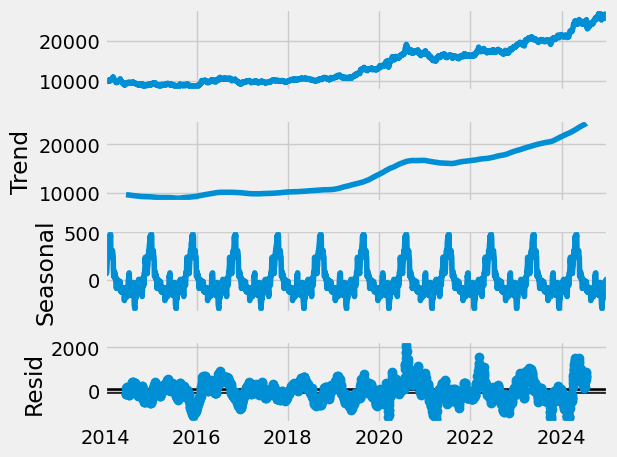

In [12]:
#from pylab import rcParams
#rcParams['figure.figsize'] = 12.5
# Add ; in the end to only show one graph
add.plot();

From the additive model above, we can see the variance of the residuals got slightly bigger after 2020.

Multiplicative model

In [13]:
mul = seasonal_decompose(tdf,model="mul", period=240)

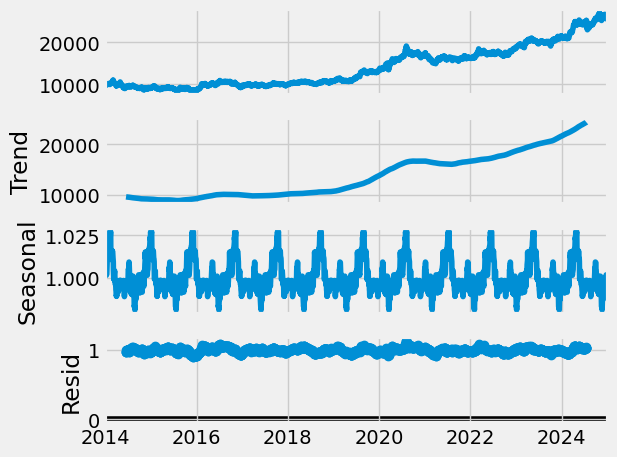

In [14]:
#from pylab import rcParams
#rcParams['figure.figsize'] = 12.5
# Add ; in the end to only show one graph
mul.plot();

The residuals from the multiplicative model have constant variance, which means this model might be better than the additive model. However, the residuals do not have a zero mean. Luckily, this could be easily fixed by adding the mean (1) to all forecasts to adjust the bias.

### Exploring the Data with Time Series Plots
ETS decomposition is not the only way to identify trend and seasonality in the data. We can use time-series plots to explore the data as well. Time-series plots are a type of graphs that display data points collected in a time sequence. In all time-series plots, the x-axis represents the time, and the y-axis represents the variable being measured. Time plots are used in many fields, such as economics, finance, and engineering to visualize and analyze changes over time.

#### Seasonal Subseries Plots
Subseries plots group data together based on the “season” you choose. The most common example of subseries plots are month plots and quarter plots. They are used to observe seasonal patterns and the changes in seasonality over time in time series data.

Statsmodels Month Plot and Quarter Plot

In [15]:
from statsmodels.graphics.tsaplots import month_plot,quarter_plot

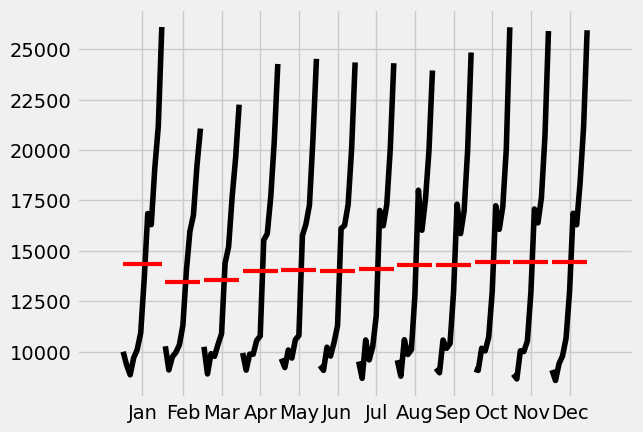

In [16]:
mdf = tdf['Price'].resample(rule='MS').mean()
month_plot(mdf);

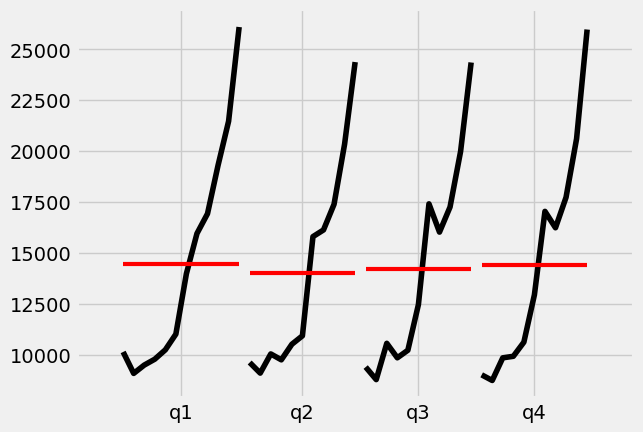

In [17]:
qdf = tdf['Price'].resample(rule='Q').mean()
quarter_plot(qdf);

The red horizontal lines in these plot are the means for months or quarters.

#### Seasonal Plot
A seasonal plot is similar to a time plot except that the data are plotted against the individual “seasons” in which the data were observed.

In [18]:
# Reset tdf to only include XAU values
tdf = tdf['Price'].to_frame()

There is no existing function that can easily plot out seasonal plot. The following code can be used to create one.

In [19]:
def seasonal_plot(df, season='year', index='month', column=None):
    """Makes a seasonal plot of one column of the input dataframe. Considers the first columns by default.
    
    Arguments:
    
    - df (Pandas DataFrame): DataFrame indexed by Datetime (see `parse_dates` parameter when reading a CSV);
    - season (string): the season that you want to considering when doing the plot, e.g., year, month, etc.;
    - index (string): corresponds to the X axis of the plot. You should choose based on the index period that you're using;
    - column (string, optional): the DataFrame column to consider. Picks the first one by default.
    """
    if column == None:
        column = df.columns[0]
        
    piv_index = getattr(df.index, index)
    piv_season = getattr(df.index, season)
    
    piv = pd.pivot_table(df, index=piv_index, columns=piv_season, values=[column])
    piv.plot(figsize=(12,5))
    plt.legend(["2013", "2014", "2015", "2016", "2017","2018", "2019", "2020", "2021", "2022","2023","2024","2025"], bbox_to_anchor=(-0.1, 0.8), title='Year')
    plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
    plt.xlabel("Month")

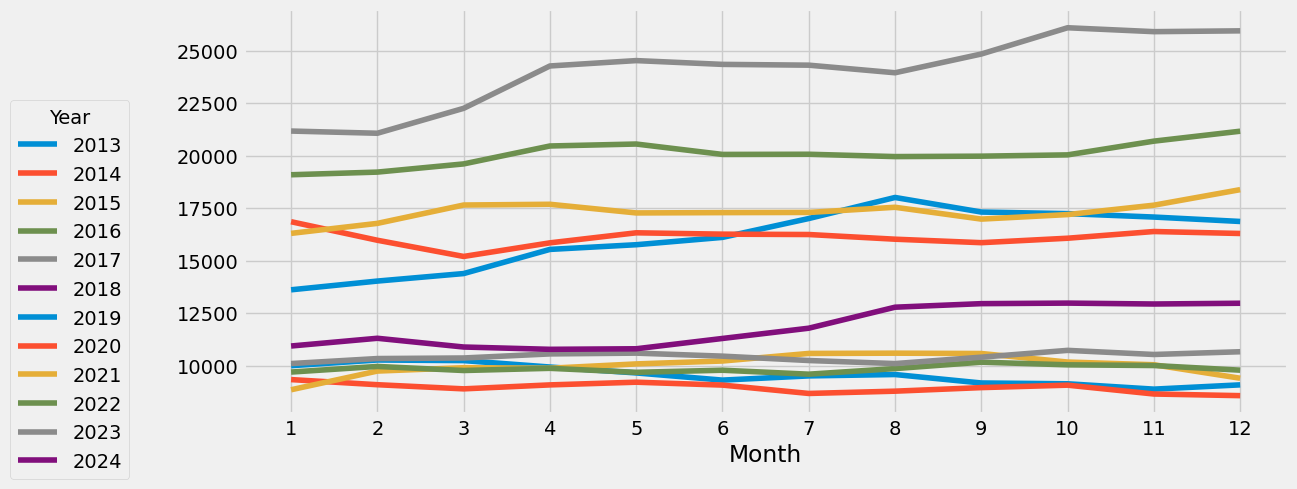

In [20]:
# Doens't seems to have certain seasonal patterns
# We can see more recent years have higher values (1600-2000)
seasonal_plot(tdf)

#### Lag Plot
A lag plot is a special type of scatter plot that plots the time series against lags of itself. It is used to evaluate whether there is autocorrelation, randomness, and outliers in a time series. If there’s any pattern shown on a lag plot, it means the data is not random. If the data shows a linear pattern on a lag plot, it means autocorrelation is present in the data. The tighter the data is clustered around the diagonal; the more autocorrelation is present.

**<font color=red>Autocorrelation</font>:**
Autocorrelation is a fundamental concept in time series analysis. It is the correlation of a value and its lagged values in a time series, meaning the time series is self-correlative. When autocorrelation exists in a time series, it means that the past values influence the current value.

Let’s see the lag plot of gold, and observe whether there is autocorrelation in gold prices.

In [21]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols
from pandas.plotting import lag_plot

In [22]:
import warnings
warnings.filterwarnings("ignore")

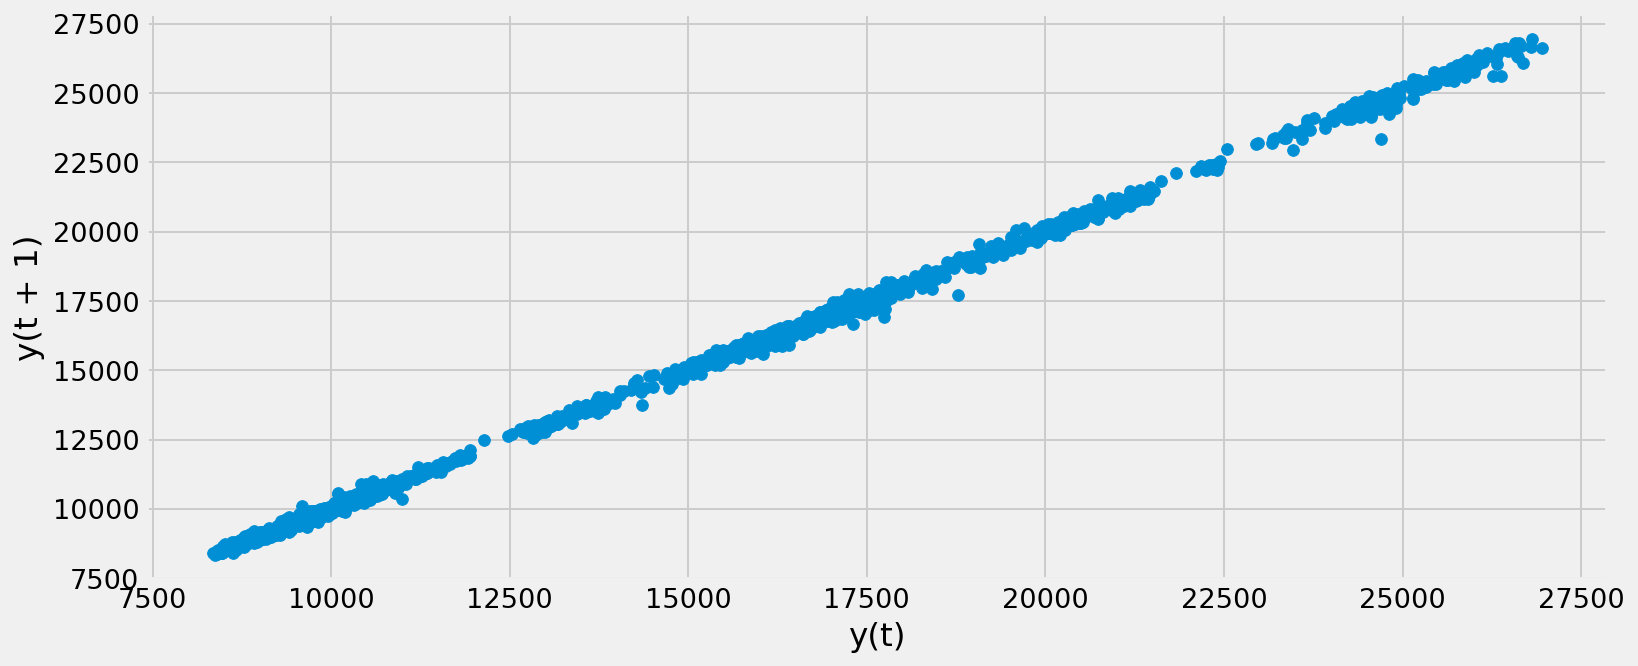

In [23]:
# Lag plot
plt.rcParams["figure.dpi"] = 140
fig, ax = plt.subplots(figsize=(12,5)) 
lag_plot(tdf);

It’s obvious that there is a linear pattern in the lag plot, meaning autocorrelation is present. In addition, the autocorrelation in gold prices is fairly strong since the data points are tightly clustered around the diagonal. That is, gold is highly correlated with its past values.

#### ACF and PACF Plots
ACF(Autocorrelation Function) plots/correlogram and PACF (Partial Autocorrelation Function) plots are also used to visualize the autocorrelation in time series data. These plots are useful for identifying randomness, <font color=red>stationarity</font>, trends, seasonality, and lag patterns.
- **ACF plots:** an autocorrelation plot(Correlogram)shows that correlation of the series with itself, lagged by x time units. So, the y-axis is the correlation and the x-axis is the number of time unites of lag. Normally, there will be a gradual decline in the data.
- **PACF plots:** gives the partial correlation of a stationary time series with its own lagged values, regressed the values of the time series at all shorter lags.

The ACF describes the autocorrelation between an observation and another observation at a prior time step that includes direct and indirect dependence information. The PACF only describes the direct relaitonship between an observation and its lag. In addition, the blue area depicts the 95% confidence interval and is an indicator of the significance threshold. That means, anything within the blue area is statistically close to zero and anything outside the blue area is statistically different than zero.

These two plots can help choose order parameters for ARIMA based models. You can also use grid search to choose order parameters.

**<font color=red>Stationarity:</font>**

A time series is stationary if its statistical properties such as mean, variance, correlations, and covariance, are constant for any segment of the time series. In other words, a stationary data is not a function of time and doesn’t exhibit trends or seasonality. This means that fluctuations in the data are entirely due to outside forces and noise. Stationarity is important because, building models on non-stationary data with varying statistical properties mentioned above will cause varying accuracy at different time points. This can lead to unreliable results and inaccurate predictions. That’s why a lot of time series models such as ARIMA and SARIMA require stationary data before modeling.

There are various methods to check whether a time series is stationary such as ADF(Augmented Dickey-Fuller) test, KPSS(Kwiatkowski-Phillips-Schmidt-Shin) test, or visual plots.

In [24]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [25]:
# ACF arrays with 40 lags
acf(tdf['Price'])

array([1.        , 0.99847087, 0.99698917, 0.9954594 , 0.99394806,
       0.99243335, 0.99096733, 0.98949778, 0.98802236, 0.98657615,
       0.98513946, 0.98370917, 0.98229995, 0.98083462, 0.97935448,
       0.97790039, 0.97644701, 0.9749544 , 0.97341894, 0.97192348,
       0.97049188, 0.96910788, 0.96771527, 0.96632352, 0.96491516,
       0.96351029, 0.96205632, 0.96063289, 0.95919501, 0.95776881,
       0.9563294 , 0.95474386, 0.95320234, 0.95167882, 0.95018552])

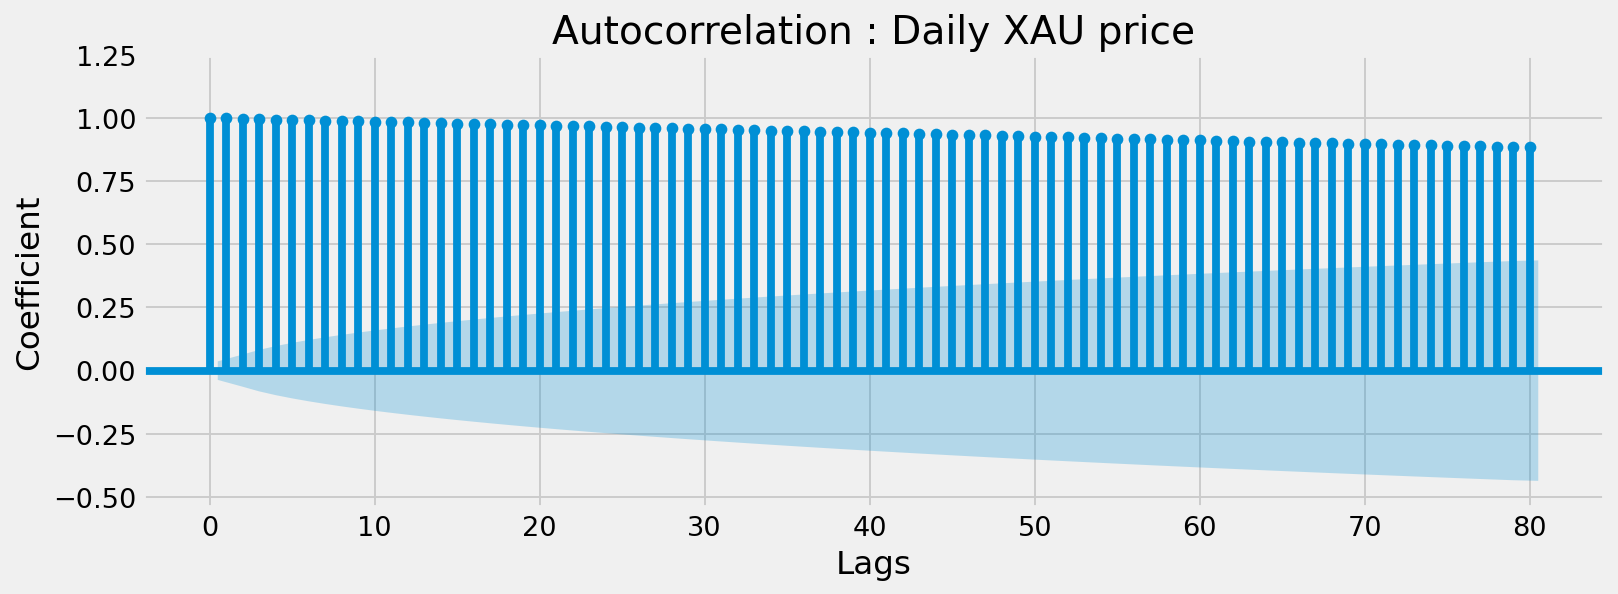

In [26]:
# ACF plot with 80 lags
# This plot indicates non-stationary data
# Gradual decline indicates that there is trend in our data
# Doesn't show seasonality as well
title = 'Autocorrelation : Daily XAU price'
lags = 80
fig, ax = plt.subplots(figsize=(12, 4))
plot_acf(tdf,title=title,lags=lags,auto_ylims=True,ax=ax)
plt.xlabel("Lags")
plt.ylabel("Coefficient");

There is significant autocorrelation in this plot. Also, the gradual decline of positive values could mean our data is trended time series and is non-stationary(ACF plot of stationary data will drop to zero relatively quickly). In addition, there is no seasonality showing in this plot (no periodic peaks).

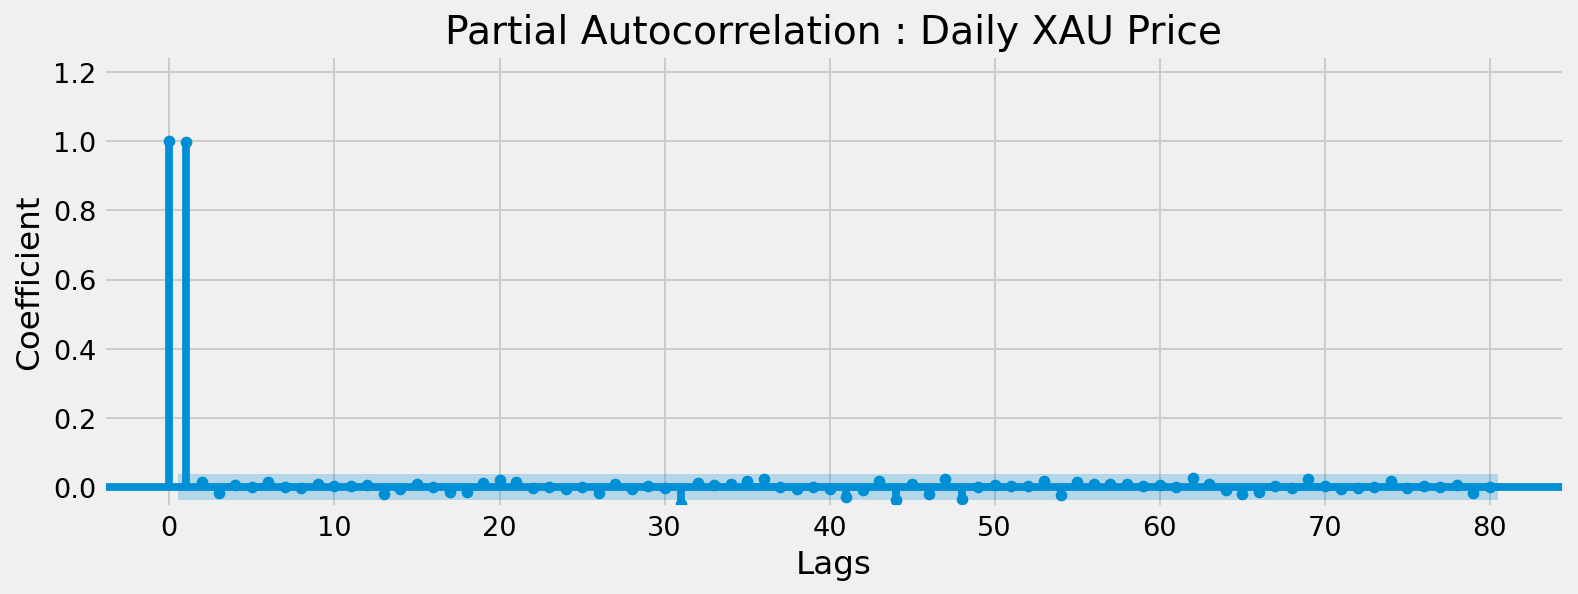

In [27]:
# PACF with 80 lags
# Sharp drop after 1
title = 'Partial Autocorrelation : Daily XAU Price'
lags =80
fig, ax = plt.subplots(figsize=(12, 4))
plot_pacf(tdf,title=title,lags=lags,auto_ylims=True,ax=ax)
plt.xlabel("Lags")
plt.ylabel("Coefficient");

There is a strong positive autocorrelation with lag 1.

### Augmented Dickey-Fuller Test and Differencing
Before building ML models for forecasting, we always need to make sure the data is stationary with no trend and seasonality. This is because building models on non-stationary data with varying statistical properties such as mean, variance, correlations, and covariance will cause varying accuracy at different time points and lead to inaccurate predictions.

From the ACF and PACF plots of gold above, we already knew our data is <font color=orange>non-stationary</font>. However, we still applied the Dickey-Fuller test as an alternative way to check the data. Then, we used a technique called “differencing” to obtain stationary data.

#### Augmented Dickey-Fuller Test
Augmented Dickey-Fuller(ADF) test is a common statistical test used to test whether a time series is stationary or not. In this test, the null hypothesis states that Φ = 1 (this is also called a unit test). The test returns several statistics including p-value. A small p-value (p<0.05) indicates strong evidence against the null hypothesis. That is, if p-value is low (<0.05), we reject the null hypothesis, indicating the dataset is stationary. If p-value is high (>0.05), we fail to reject the null hypothesis, indicating the dataset is non-stationary.

In [28]:
from statsmodels.tsa.stattools import adfuller

In [29]:
# Pass in a time series and an optional title, returns an ADF report
def adf_test(series,title=''):
    
    print(f"Augmented Dickey-Fuller Test : {title}")
    # .dropna() handles differenced data
    result = adfuller(series.dropna(),autolag='AIC') 
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    
    # the fifth result(form : dictionary) is critical value 1%-10%
    for key,val in result[4].items():
          # create a row in Series
          out[f'critical value ({key})'] = val
    
    # .to_string() removes the line "dtype: float64"
    print(out.to_string())
          
    # result[1] is p-value
          
    if result[1] <=0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")
          

In [30]:
# We know our data is non-stationary
# This means if we want to use machine learning model, we need to make our data stationary
adf_test(tdf)

Augmented Dickey-Fuller Test : 
ADF test statistic         1.343028
p-value                    0.996839
# lags used                2.000000
# observations          2845.000000
critical value (1%)       -3.432651
critical value (5%)       -2.862556
critical value (10%)      -2.567311
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data is non-stationary


The test results showed that the data of gold is non-stationary.

#### Differencing
Non-stationary data can be made to look stationary through differencing. Differencing computes the differences between consecutive observations. It can help stabilize the mean of a time series by removing changes in the level of a time series, and therefore eliminating(or reducing) trend and seasonality. ACF plot is useful for identifying non-stationary time series. For a stationary time series, the ACF will drop to zero relatively quickly, while the ACF of non-stationary data decreases slowly.

Note that sometimes differencing the data one time is not enough. It may be necessary to difference the data a second time to obtain a stationary series. This is called “second-order differencing”.

To make gold prices stationary, I created a new column called “diff” on the original DataFrame to store the differences in values.

In [31]:
from statsmodels.tsa.statespace.tools import diff

In [33]:
# First order differencing
# Each differencing step will lose one row of data
tdf['diff'] = diff(tdf['Price'],k_diff=1)
tdf

,Price,diff
Date,,
2014-01-01,10044.28,NaN
2014-01-02,10191.50,147.22
2014-01-03,10107.18,-84.32
2014-01-04,9954.86,-152.32
2014-01-06,9900.46,-54.40
...,...,...
2024-12-31,25918.88,243.10
2025-01-01,25912.76,-6.12
2025-01-02,26128.66,215.90


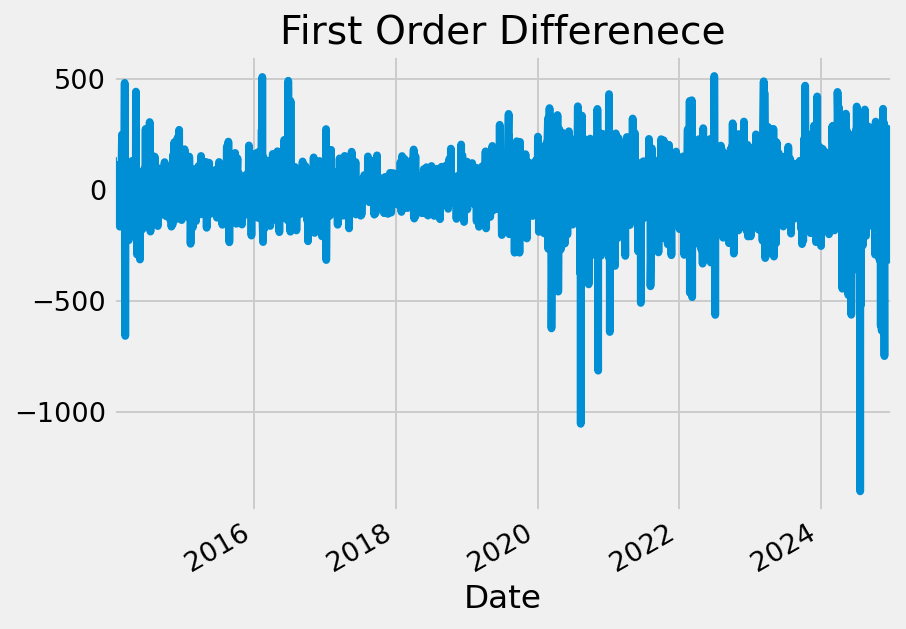

In [34]:
tdf['diff'].plot(title="First Order Differenece").autoscale(axis='x',tight=True)

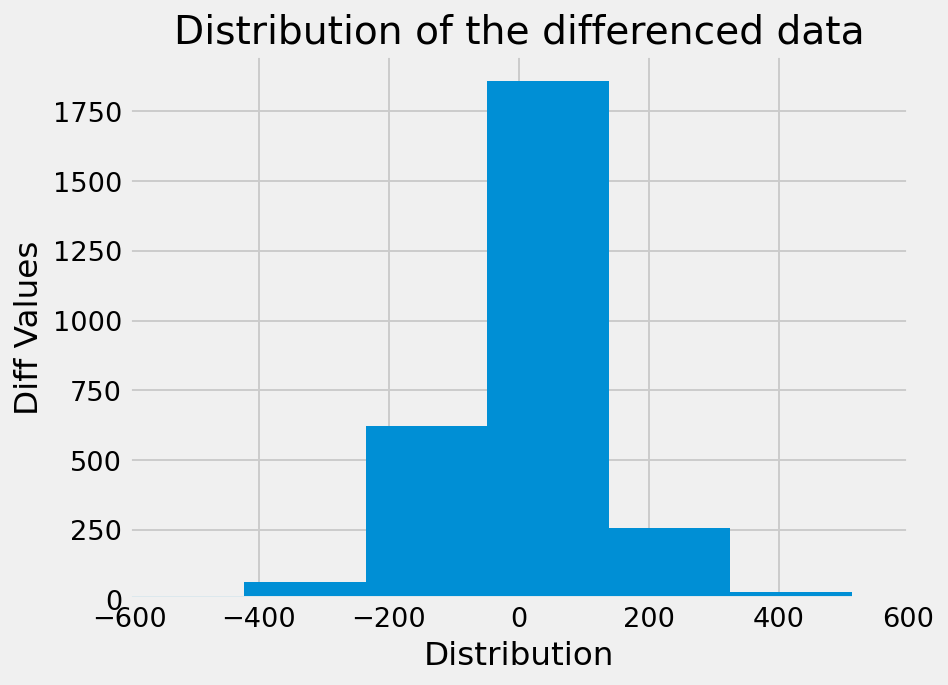

In [40]:
# The differenced data has a normal distribution
tdf['diff'].hist()
plt.title("Distribution of the differenced data")
plt.xlabel("Distribution")
plt.ylabel("Diff Values")
plt.xlim(-600,600);

In [36]:
# The mean is nearly zero
tdf['diff'].mean()

5.68541622760801

In [37]:
# After first order differencing, our data became stationary
# This ensures a zero mean and constant variance
adf_test(tdf['diff'])

Augmented Dickey-Fuller Test : 
ADF test statistic       -35.970466
p-value                    0.000000
# lags used                1.000000
# observations          2845.000000
critical value (1%)       -3.432651
critical value (5%)       -2.862556
critical value (10%)      -2.567311
Strong evidence against the null hypothesis
Reject the null hypothesis
Data is stationary


This test result shows that the differenced gold data is stationary, which ensures a zero mean and constant variance.

The lag plot of the differenced data below also shows that there is little evidence of autocorrelation in the data.

In [41]:
# Drop the first row with NaN value
f_diff = tdf['diff'].dropna().to_frame()
f_diff

,diff
Date,
2014-01-02,147.22
2014-01-03,-84.32
2014-01-04,-152.32
2014-01-06,-54.40
2014-01-07,-54.40
...,...
2024-12-31,243.10
2025-01-01,-6.12
2025-01-02,215.90


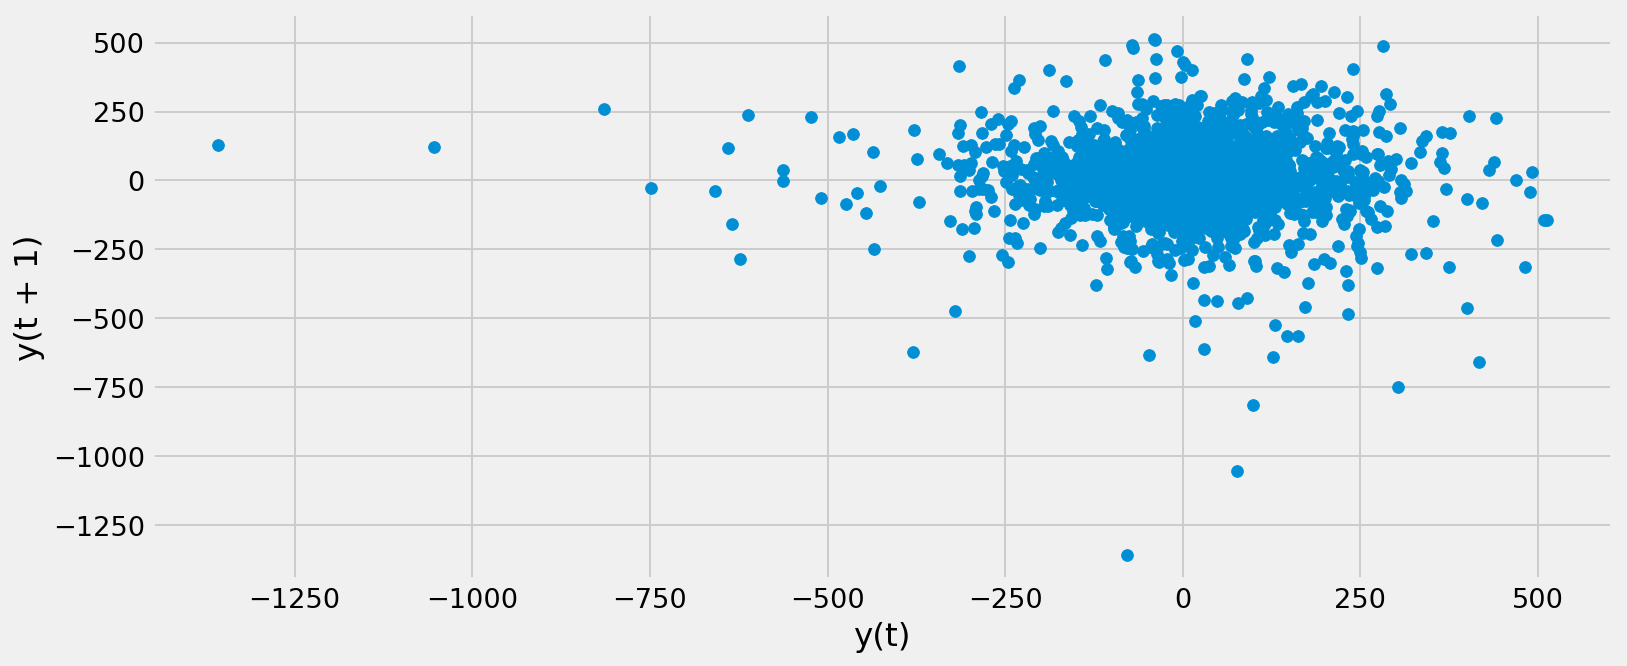

In [42]:
# Lag plot
# There is little evidence of autocorrelation after 1st order differencing
plt.rcParams["figure.dpi"] = 140
fig, ax = plt.subplots(figsize=(12,5)) 
lag_plot(f_diff);

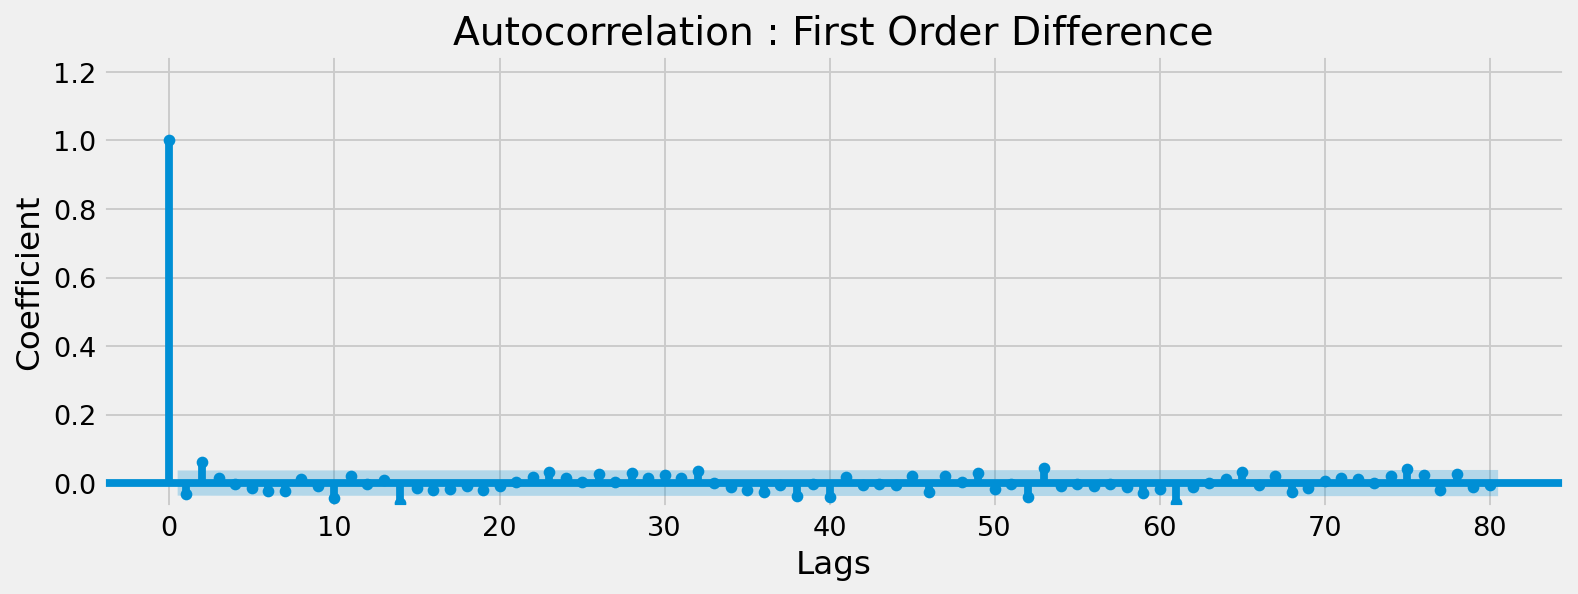

In [43]:
# ACF plot with 80 lags
# Sharp drop
title = 'Autocorrelation : First Order Difference'
lags = 80
fig, ax = plt.subplots(figsize=(12, 4))
plot_acf(f_diff,title=title,lags=lags,auto_ylims=True,ax=ax)
plt.xlabel("Lags")
plt.ylabel("Coefficient");

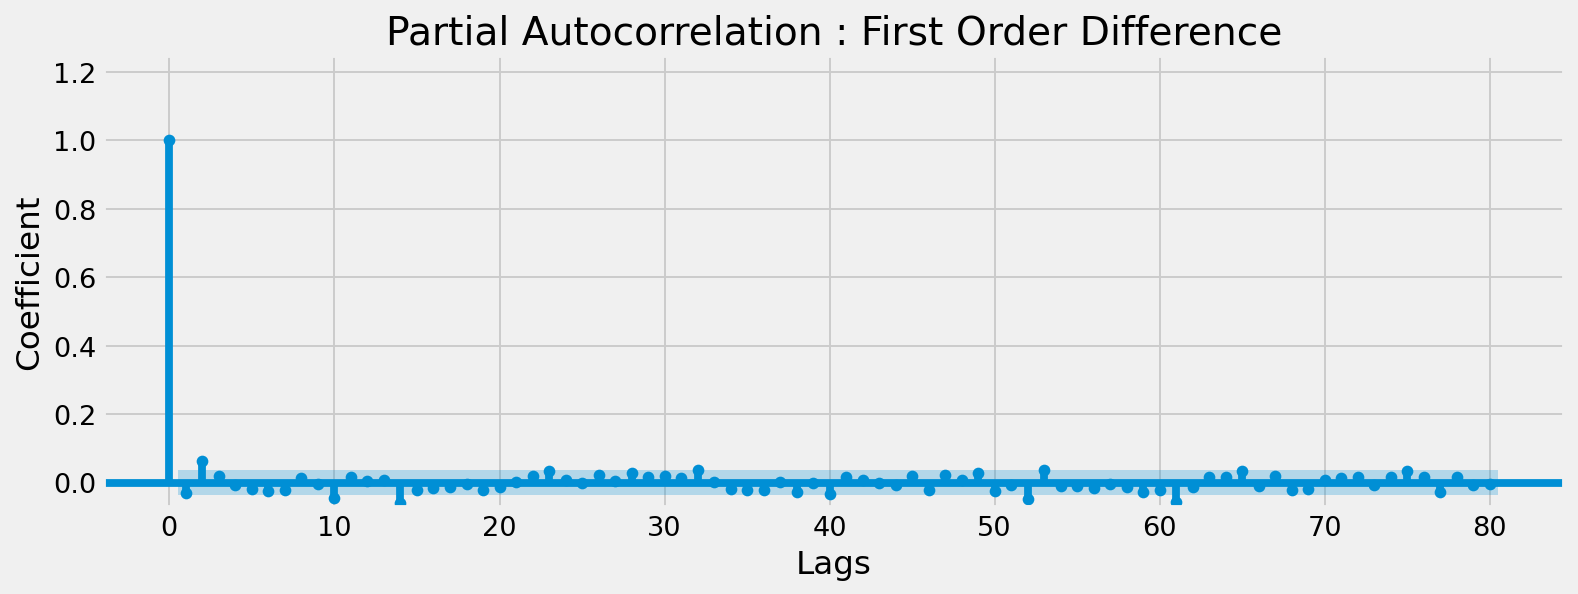

In [44]:
# PACF with 80 lags
# Sharp drop 
title = 'Partial Autocorrelation : First Order Difference'
lags =80
fig, ax = plt.subplots(figsize=(12, 4))
plot_pacf(f_diff,title=title,lags=lags,auto_ylims=True,ax=ax)
plt.xlabel("Lags")
plt.ylabel("Coefficient");

### The following is a comparison between the original and the differenced data


In [46]:
import seaborn as sns

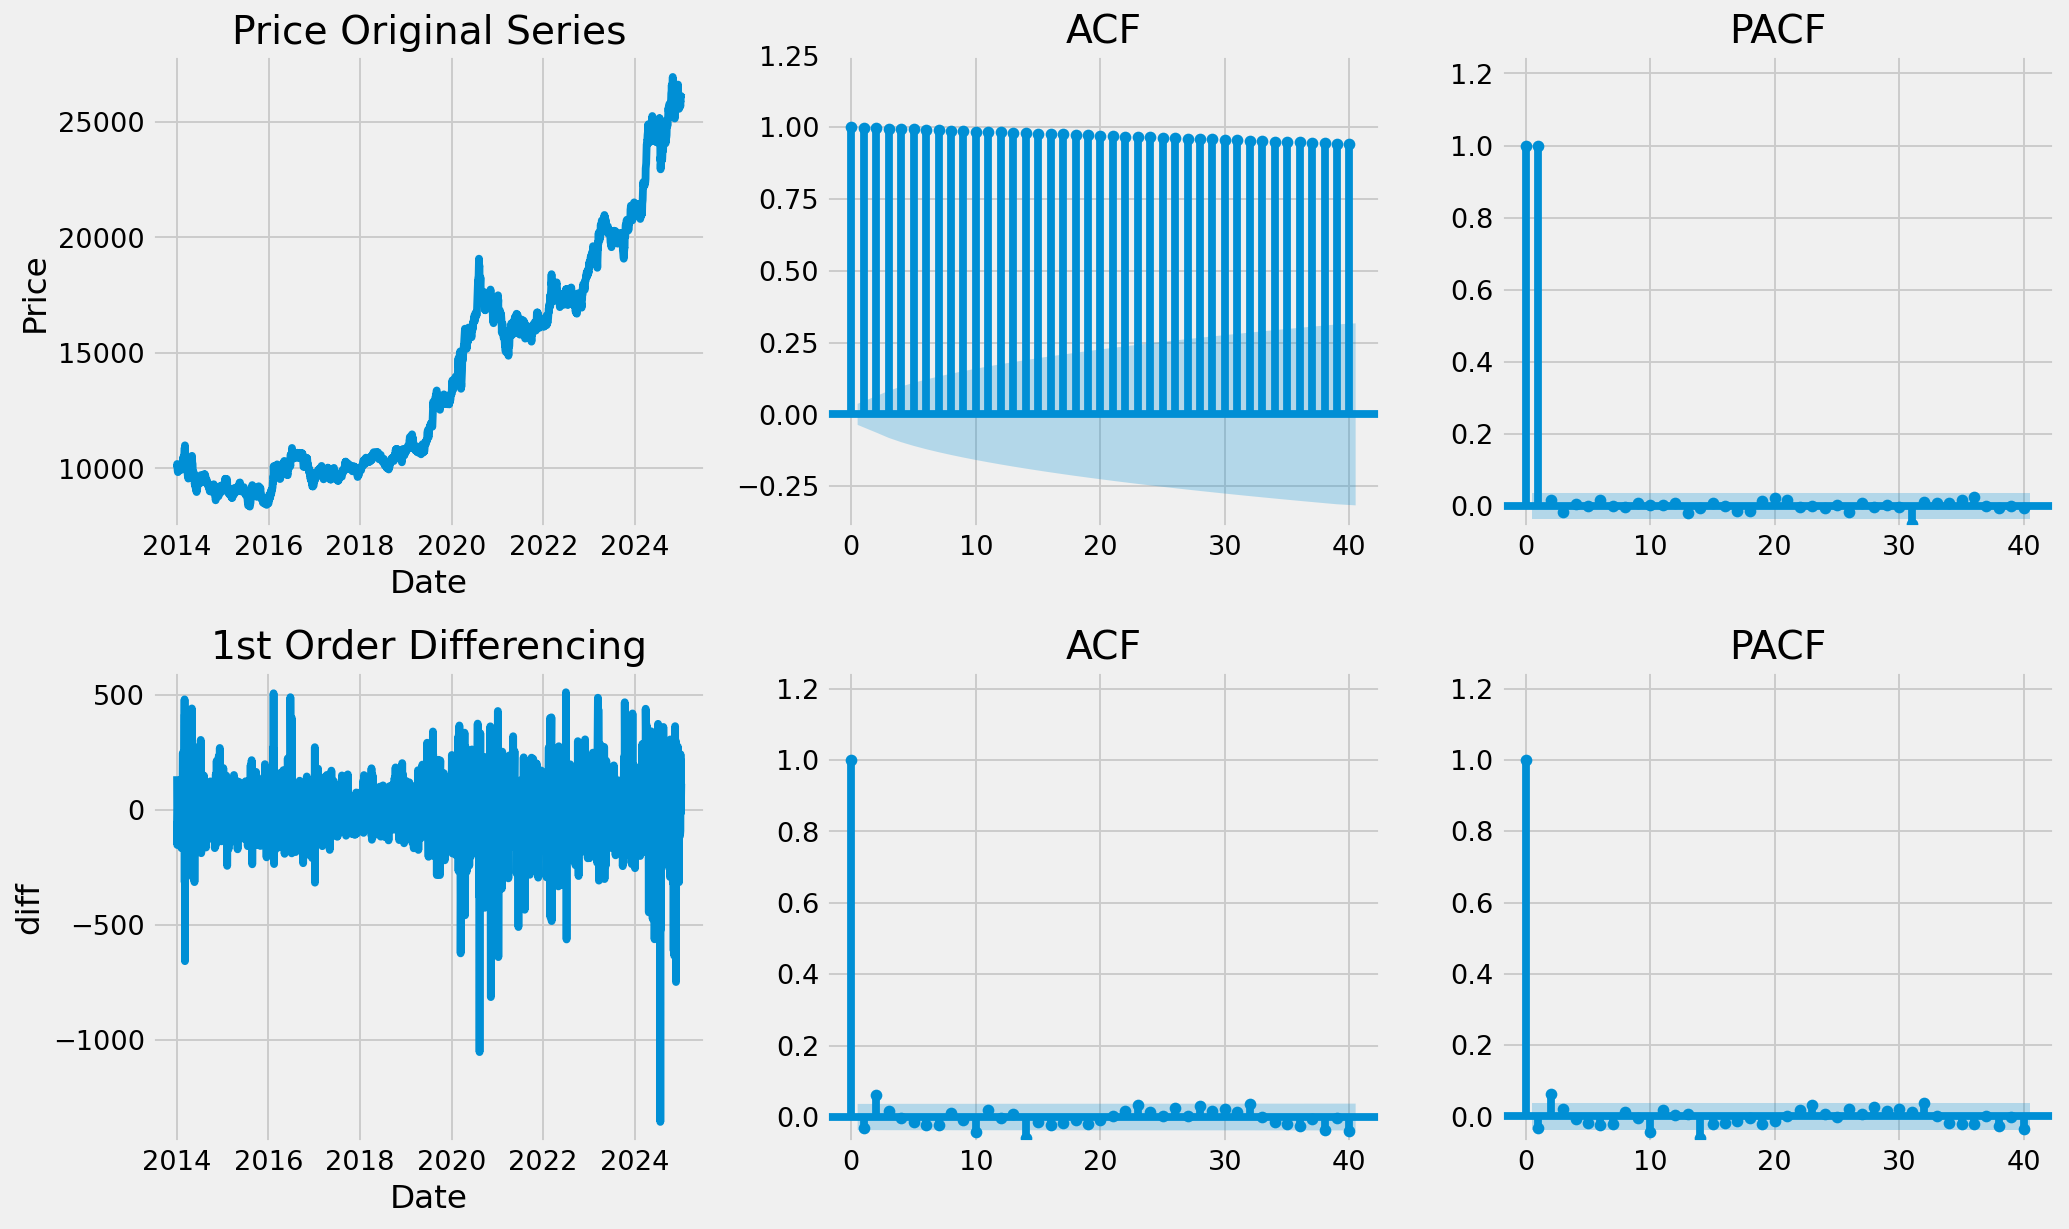

In [47]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 9))
sns.lineplot(y='Price', x='Date', data=tdf, ax=axes[0,0]).set_title("Price Original Series");
plot_acf(tdf['Price'], lags=40, ax=axes[0, 1],title='ACF',auto_ylims=True)
plot_pacf(tdf['Price'], lags=40, ax=axes[0, 2],title='PACF',auto_ylims=True)

sns.lineplot(y='diff', x='Date', data=f_diff, ax=axes[1,0]).set_title("1st Order Differencing");
plot_acf(f_diff, lags=40, ax=axes[1, 1],title='ACF',auto_ylims=True)
plot_pacf(f_diff, lags=40, ax=axes[1, 2],title='PACF',auto_ylims=True)

plt.tight_layout()
plt.show();

The ACF plot of differenced gold prices looks just like that of a white noise series. There is no line except lag 0 lies outside of the 95% confidence zone, meaning there is no significant autocorrelation to any lag. This suggests that the daily change in gold prices is essentially a random series, which is uncorrelated with the change of previous days. The differenced data is now confirmed to be a white noise series.

Since <font color=orange>the original gold prices = the previous day’s gold prices + the daily change in gold prices(a white noise)</font>, we can conclude that the time series of gold is a <font color=red>random walk</font>.

The formula of random walk: $X_t = X_{t-1} + Z_t,$ where
- $X_t:$ The value at time $t$
- $X_{t-1}:$ The value at time $t-1$
- $Z_t:$ A random value from a normal distribution

Because the time series of gold is a random walk, we cannot use any statistical methods to estimate the randomness. A random walk is unpredictable. The best prediction method for random walk is to use the previous observation for the next time step. This means naive methods(last known value, mean, drifting values etc) would be the best to forecast a random walk.

**<font color=red>White Noise and Random Walk </font>**

White noise is a type of time series model consist of random values with zero mean, constant standard deviation, and non-significant autocorrelation. White noise time series is random and cannot be predicted.

Rearranging white noise formula leads to the “random walk” model. which is widely used for financial and economic data. Random walk model typically have long periods of apparent trend up or down and sudden and unpredictable changes in direction.

Just as white noise, random walk series is also non-predictable. The difference between white noise series and random walk series is that the values of a random walk series are not random numbers. The current value of a random walk model is equal to the previous observation with a random step up or down. Therefore, given the way that the random walk is constructed, we would expect a random walk to be non-stationary. Random walk theory implies that the stock market is efficient and reflects all available information by adjusting quickly to new information before anyone can act on it. Random walk theory considers fundamental analysis undependable due to the often-poor quality of information collected and its ability to be misinterpreted. It also challenges the effectiveness of technical analysis that traders used to identify and profit from patterns or trends in stock prices.

**More details on random walk :**
 - (Youtube) Random Walk Model - Applied Time Series Analysis in Python and TensorFlow:

   https://www.youtube.com/watch?v=PSpb7rJWXww&ab_channel=DataSciencewithMarco
   
 - (Article) A Gentle Introduction to the Random Walk for Times Series Forecasting with Python:

   https://machinelearningmastery.com/gentle-introduction-random-walk-times-series-forecasting-python/


## Modeling & Forecasting
<font color=red>As mentioned above, the best prediction method for gold prices should be the naive method.</font> Nevertheless, We were curious about how other ML models would perform on gold prices. Below we provide some possible model types and their descriptions.

### ARIMA Models, Fundamental Analysis, Technical Analysis, & Random Walk
Stock price data has so many outside factors that much of the information informing the price of the stock won't be available with just the time stamped price information. ARIMA performs very well when working with a time series where the data is directly related to the time stamp,but it won't be able to understand any outide factors that is already presented in the current data. This means ARIMA model might not be an ideal model to predict future stock price.

Fundamental analysis is a method of evaluating securities by attempting to measure the intrinsic value of a stock. Fundamental analysts study everything from the overall economy and industry conditions to the financial condition and management of companies. Earnings, expenses, assets, and liabilities are all important characteristics to fundamental analysts.

Technical analysis differs from fundamental analysis in that the stock's price and volume are the only inputs. The core assumption of Technical Analysis in trading is that all known fundamentals are factored into price; thus, there is no need to pay close attention to them. Technical analysts do not attempt to measure a security's intrinsic value, but instead, use stock charts to identify patterns and trends that suggest what a stock will do in the future.

Technical analysis has three main principles and assumptions: (1) The market discounts everything, (2) prices move in trends and countertrends, and (3) price action is repetitive, with certain patterns reoccurring.

Random walk theory suggests that changes in asset prices are random. This means that stock prices move unpredictably, so that past prices cannot be used to accurately predict future prices. Random walk theory also implies that the stock market is efficient and reflects all available information.Random walk theory considers fundamental analysis undependable due to the often-poor quality of information collected and its ability to be misinterpreted.

Global Univariate models (SARIMAX, Tree-Based Methods, MLP, CNN, RNN/LSTM)

## **<font color=Yellow> Here we use LSTM Model to forecast**

## Split The Data

In [48]:
# Target Column is Price
training,test=[],[]
no_cols=1
time_steps=60
features=data['Price']
features=pd.DataFrame(features)  # Convert typr 'Series' to 'DataFrame'
train_size=int(len(features) * .80)
test_size=len(features) - train_size
print(f'Train size: {train_size} \n Test size: {test_size}')


Train size: 2278 
 Test size: 570


## Normalize The Data

In [49]:
scaler = MinMaxScaler(feature_range= (0, 1))
scaled_data = scaler.fit_transform(np.array(features).reshape(-1, 1))

In [50]:
training=scaled_data[:train_size,:]  # from 0 to number 'train_size'
test=scaled_data[train_size-time_steps:,:] # from number 'train_size-time_steps' to the end. This ensures that the time step is correct when the first step is taken.
training.shape,test.shape

((2278, 1), (630, 1))

### Here, 'x_train' is a package containing data of each time step. In this example, 60 data are packaged into one package because time step = 60. And 'y_train' is all the data used to compare with 'x_train' and calculate the error, similar to the concept of autoregression

In [51]:
x_train = []
y_train = []

for i in range(60, len(training)):
    x_train.append(training[i-60:i, 0])  # every 60 package, e.g. 0:60, 1:61, 2:62 and so on
    y_train.append(training[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))  # convert 'x_train' shape from (2218,60) to (2218,60,1)


In [52]:
x_train.shape,y_train.shape

((2218, 60, 1), (2218,))

## LSTM Model

In [53]:
model=models.Sequential([
    layers.LSTM(60, return_sequences= True, input_shape= (x_train.shape[1], 1)),
    layers.LSTM(64, return_sequences= True),
    layers.LSTM(64, return_sequences= False),
    layers.Dense(32,activation='relu'),
    layers.Dense(16,activation='relu'),
    layers.Dense(1,activation='linear')
])

In [54]:
model.compile(optimizer='adam',loss='mse',metrics=['mean_absolute_error'])

In [55]:
model.build()

In [56]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 60)         │        14,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 60, 64)         │        32,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 82,529 (322.38 KB)

 Trainable params: 82,529 (322.38 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
history=model.fit(x_train,y_train,epochs=100,batch_size=32,verbose=1,
                  callbacks=[tf.keras.callbacks.EarlyStopping(monitor= 'loss', patience= 10 , restore_best_weights= True)])

Epoch 1/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0163 - mean_absolute_error: 0.0759
Epoch 2/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 3.8226e-04 - mean_absolute_error: 0.0144
Epoch 3/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 3.0223e-04 - mean_absolute_error: 0.0129
Epoch 4/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 3.2499e-04 - mean_absolute_error: 0.0135
Epoch 5/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 3.0259e-04 - mean_absolute_error: 0.0130
Epoch 6/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.6189e-04 - mean_absolute_error: 0.0118
Epoch 7/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.6180e-04 - mean_absolute_error: 0.0120
Epoch 8/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.5864e-04 - mean_absolute_error: 0.0120
Epoch 9/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.5876e-04 - mean_absolute_error: 0.0117
Epoch 10/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.3826e-04 - mean_absolute_error: 

## Show The Model performance

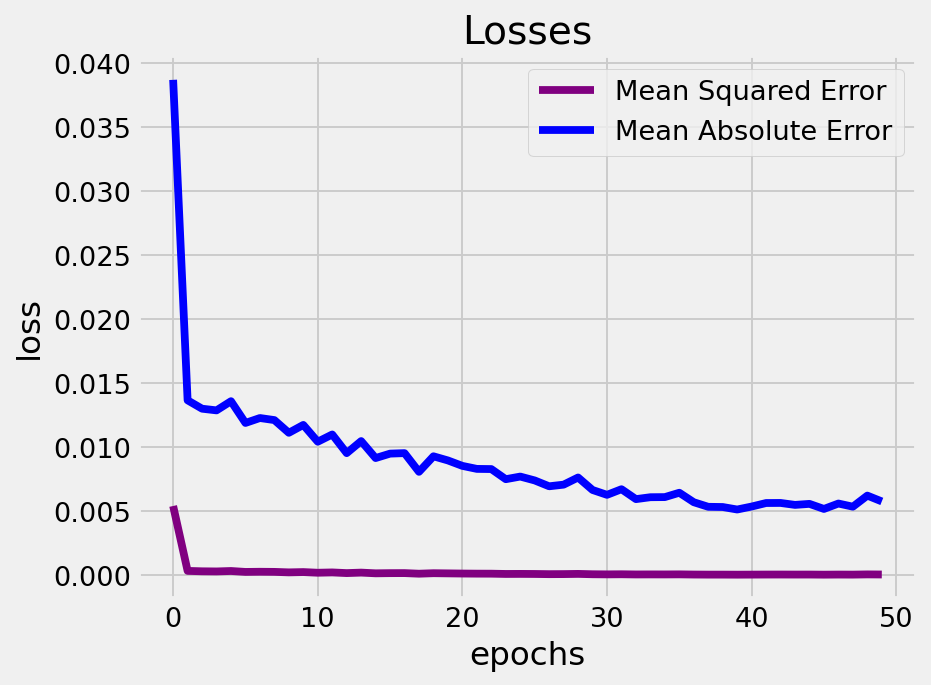

In [61]:
plt.plot(history.history["loss"],colors[0])
plt.plot(history.history["mean_absolute_error"],colors[2])
plt.legend(['Mean Squared Error','Mean Absolute Error'])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

## Predictions

In [62]:
x_test = []
y_test = []

for i in range(60, len(test)):
    x_test.append(test[i-60:i, 0])
    y_test.append(test[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [63]:
x_test.shape,y_test.shape

((570, 60, 1), (570,))

In [64]:
predictions = model.predict(x_test)

#inverse predictions scaling
predictions = scaler.inverse_transform(predictions)
predictions.shape

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step 


(570, 1)

## Root Mean Squared Error

In [65]:
#inverse y_test scaling
y_test = scaler.inverse_transform([y_test])

In [66]:
RMSE = np.sqrt(np.mean( y_test - predictions )**2).round(2)
RMSE

280.33

In [67]:
train = features.iloc[:train_size , 0:1]
test = features.iloc[train_size: , 0:1]
test['Predictions'] =predictions
test

,Price,Predictions
Date,,
2022-10-19,16993.54,17210.037109
2022-10-20,16978.92,17155.677734
2022-10-21,17122.74,17104.087891
2022-10-24,17108.46,17189.447266
2022-10-25,17120.02,17229.691406
...,...,...
2024-12-31,25918.88,24753.417969
2025-01-01,25912.76,25033.279297
2025-01-02,26128.66,25051.404297


## Visualize data Vs predictions

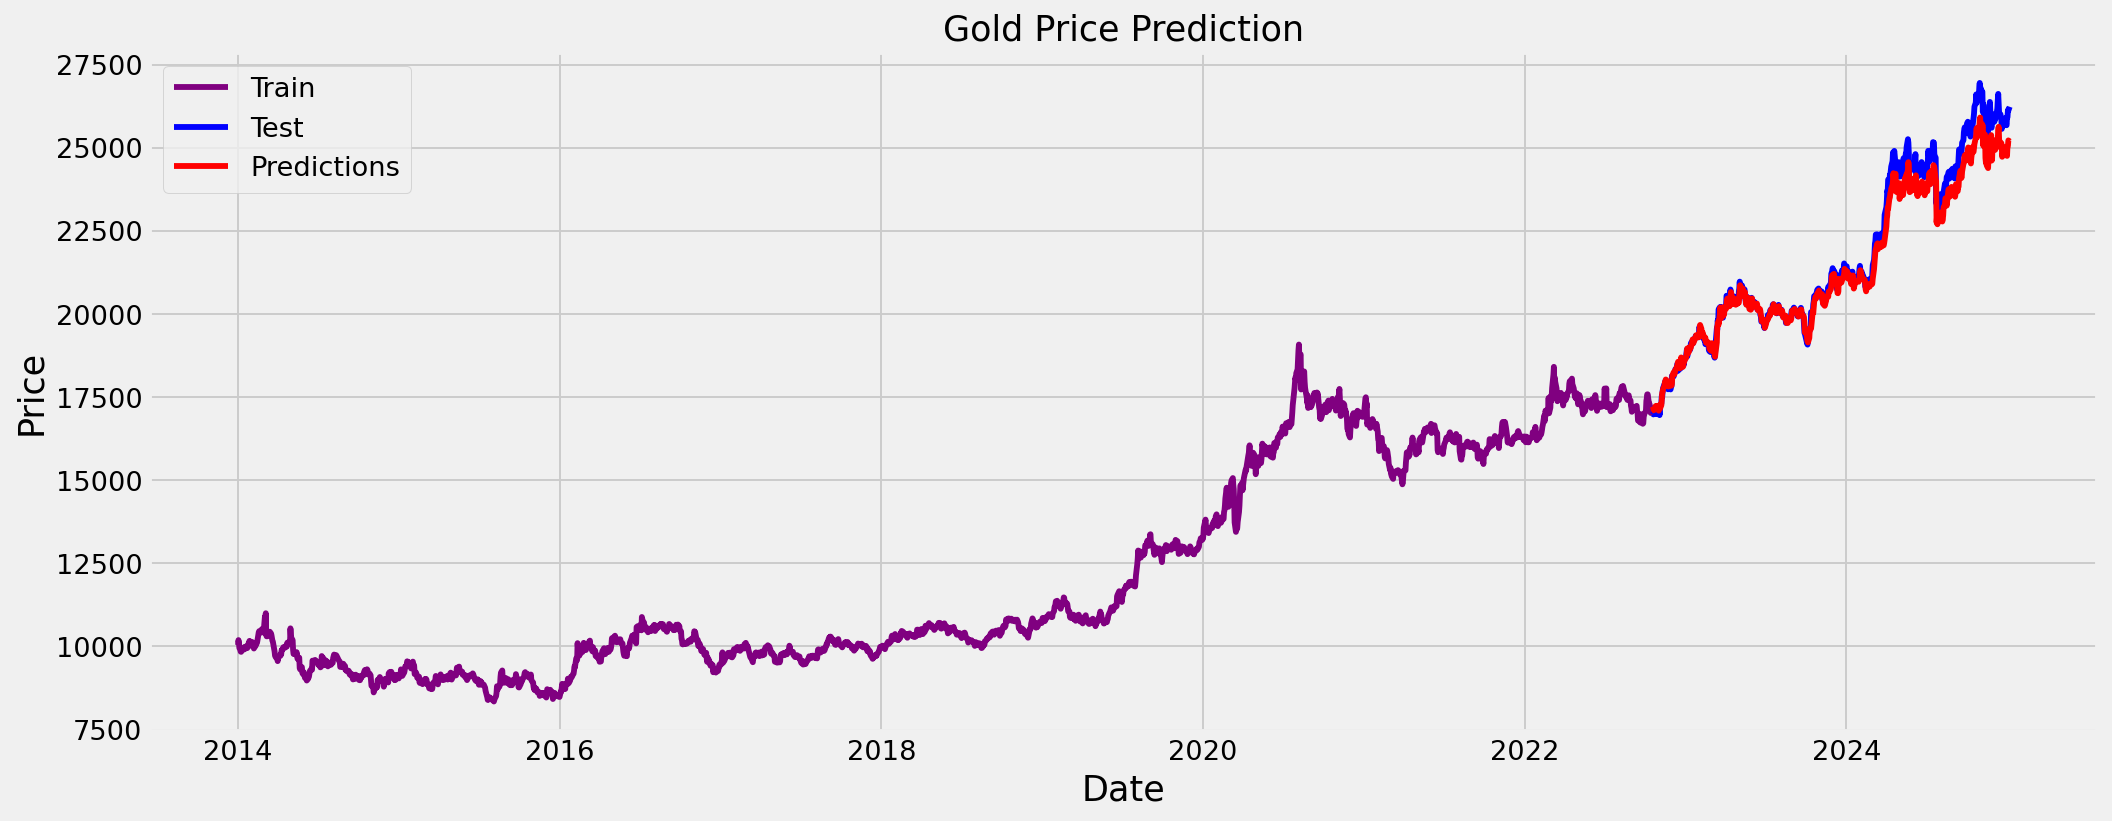

In [68]:
plt.figure(figsize= (16, 6))
plt.title('Gold Price Prediction', fontsize= 18)
plt.xlabel('Date', fontsize= 18)
plt.ylabel('Price', fontsize= 18)
plt.plot(train['Price'],colors[0] ,linewidth= 3)
plt.plot(test['Price'],colors[2] ,linewidth= 3)
plt.plot(test["Predictions"],colors[5] ,linewidth= 3)
plt.legend(['Train', 'Test', 'Predictions'])

## Forecast The Next 30 days
Use the last time step (that is, the last 60 days with data) to predict the next day, then discard the oldest data, add the latest prediction, form the next step and continue predicting, and so on.

In [69]:
def insert_end(Xin, new_input):
    timestep = 60
    for i in range(timestep - 1):
        Xin[:, i, :] = Xin[:, i+1, :]    # The oldest data is discarded and the rest are moved to the previous one
    Xin[:, timestep - 1, :] = new_input  # The last one is replaced with new predict
    return Xin

In [70]:
future = 90  # Actual forecast days
forcast = []
Xin = x_test[-1 :, :, :]
time = []
for i in range(0, future):
    out = model.predict(Xin, batch_size=5)
    forcast.append(out[0, 0])
    print(forcast)
    Xin = insert_end(Xin, out[0, 0])
    time.append(pd.to_datetime(data.index[-1]) + timedelta(days=i))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[0.9053408]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[0.9053408, 0.8538465]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[0.9053408, 0.8538465, 0.80712634]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[0.9053408, 0.8538465, 0.80712634, 0.77602077]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[0.9053408, 0.8538465, 0.80712634, 0.77602077, 0.75973165]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[0.9053408, 0.8538465, 0.80712634, 0.77602077, 0.75973165, 0.75151515]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[0.9053408, 0.8538465, 0.80712634, 0.77602077, 0.75973165, 0.75151515, 0.74428153]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[0.9053408, 0.8538465, 0.80712634, 0.77602077, 0.75973165, 0.75151515, 0.74428153, 0.73339087]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[0.9053408, 0.8538465, 0.80712634, 0.77602077, 0.75973165, 0.75151515, 0.74428153, 0.73339087, 0.71781063]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[0.9053408, 0.8538465, 0.80712634, 0.77602077, 0.75973165, 0.75151515, 0.74428153, 0.733

## Create forecasted dataframe

In [71]:
forcasted = np.asanyarray(forcast)
forcasted = forcasted.reshape(-1, 1)


In [72]:
forcasted= scaler.inverse_transform(forcasted)

In [73]:
forcasted = pd.DataFrame(forcasted)
date = pd.DataFrame(time)
df_result = pd.concat([date,forcasted], axis=1)
df_result.columns = "Date", "Forecasted"

In [74]:
df_result.head(30)

,Date,Forecasted
0,2025-01-06,25186.521484
1,2025-01-07,24228.621094
2,2025-01-08,23359.529297
3,2025-01-09,22780.900391
4,2025-01-10,22477.888672
5,2025-01-11,22325.044922
6,2025-01-12,22190.484375
7,2025-01-13,21987.896484
8,2025-01-14,21698.070312
9,2025-01-15,21355.039062
